In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sb_plt

import torch
from sklearn.model_selection import train_test_split

from scipy.stats import kurtosis as scipy_kurtosis
from scipy.stats import skew as scipy_skew
from scipy.optimize import curve_fit

import datetime
import pathlib

print("torch version: ", torch.__version__)
plt.style.use("ggplot")

torch version:  2.4.1+cu121


In [3]:
GPU_DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
GPU_DEVICE

device(type='cuda', index=0)

In [4]:
LOGGING = {}
LOGS_PATH = "linear_models_analysis_plots/"

# Load Data

## Load Predictions data (Ground-Truth Available)

In [5]:
pred_lengths = [24, 36, 48, 60]
models = ["Linear", "DLinear", "NLinear"]

input_data = {}
ground_truth_data = {}
predictions_data = {}

for model in models:
    # Initialise datasets for each model
    input_data[model], ground_truth_data[model], predictions_data[model] = {}, {}, {}
    for pred_len in pred_lengths:
        datafolder = f"./results/{model}_{pred_len}/"
        
        input_data[model][pred_len] = np.load(datafolder + "test_input.npy")
        ground_truth_data[model][pred_len] = np.load(datafolder + "test_ground_truth.npy")
        predictions_data[model][pred_len] = np.load(datafolder + "test_predictions.npy")

## Load

In [6]:
# pred_lengths = [24, 36, 48, 60]

# models = ["Linear", "DLinear", "NLinear"]

# future_input_data = pd.read_csv("./dataset/exchange_rate.csv")
# future_input_data["date"] = pd.to_datetime(future_input_data["date"]) # Set date column format
# future_input_data = future_input_data.iloc[-104:]  # Sequence length: 104. Select last 104 values as input and drop date column

# future_predictions_data = {}

# for model in models:
#     # Initialise datasets for each model
#     future_predictions_data[model] = {}
#     for pred_len in pred_lengths:
#         datafolder = f"./results/{model}_{pred_len}/"
        
#         future_predictions_data[model][pred_len] = pd.read_csv(datafolder + "future_predictions.csv")
#         # Set date column format
#         future_predictions_data[model][pred_len]["date"] = pd.to_datetime(future_predictions_data[model][pred_len]["date"])


### Plot Input Data With Custom Colors

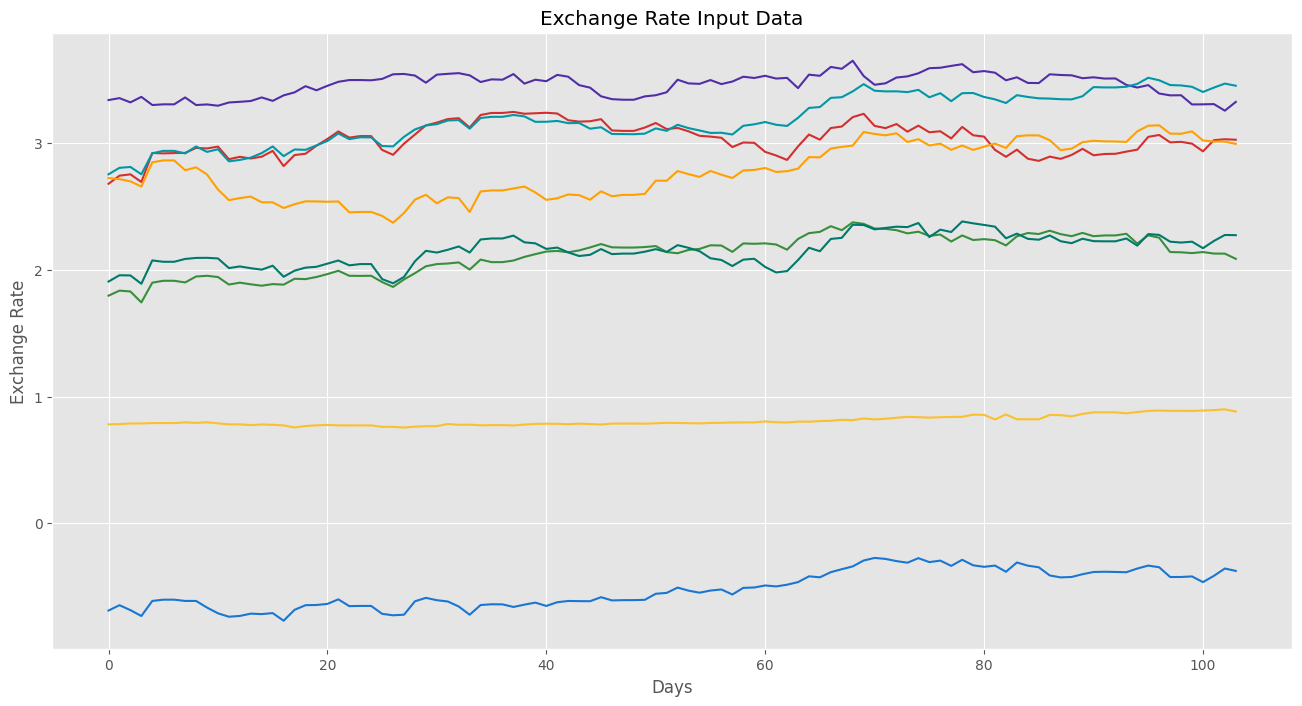

In [7]:
multi_colors = ['#D32F2F', '#1976D2', '#388E3C', '#FFA000', "#FBC02D", '#512DA8', "#0097A7", "#00796B"]

BATCH_INDEX = 10
fig, axs = plt.subplots(1,1, figsize=(16,8))

axs.set_prop_cycle('color', multi_colors)
axs.plot(input_data["DLinear"][24][BATCH_INDEX])

plt.xlabel("Days")
plt.ylabel("Exchange Rate")

plt.title("Exchange Rate Input Data")
plt.show()

# Plot Predictions (Ground-Truth Available)

## Linear Predictions

### 24 Days

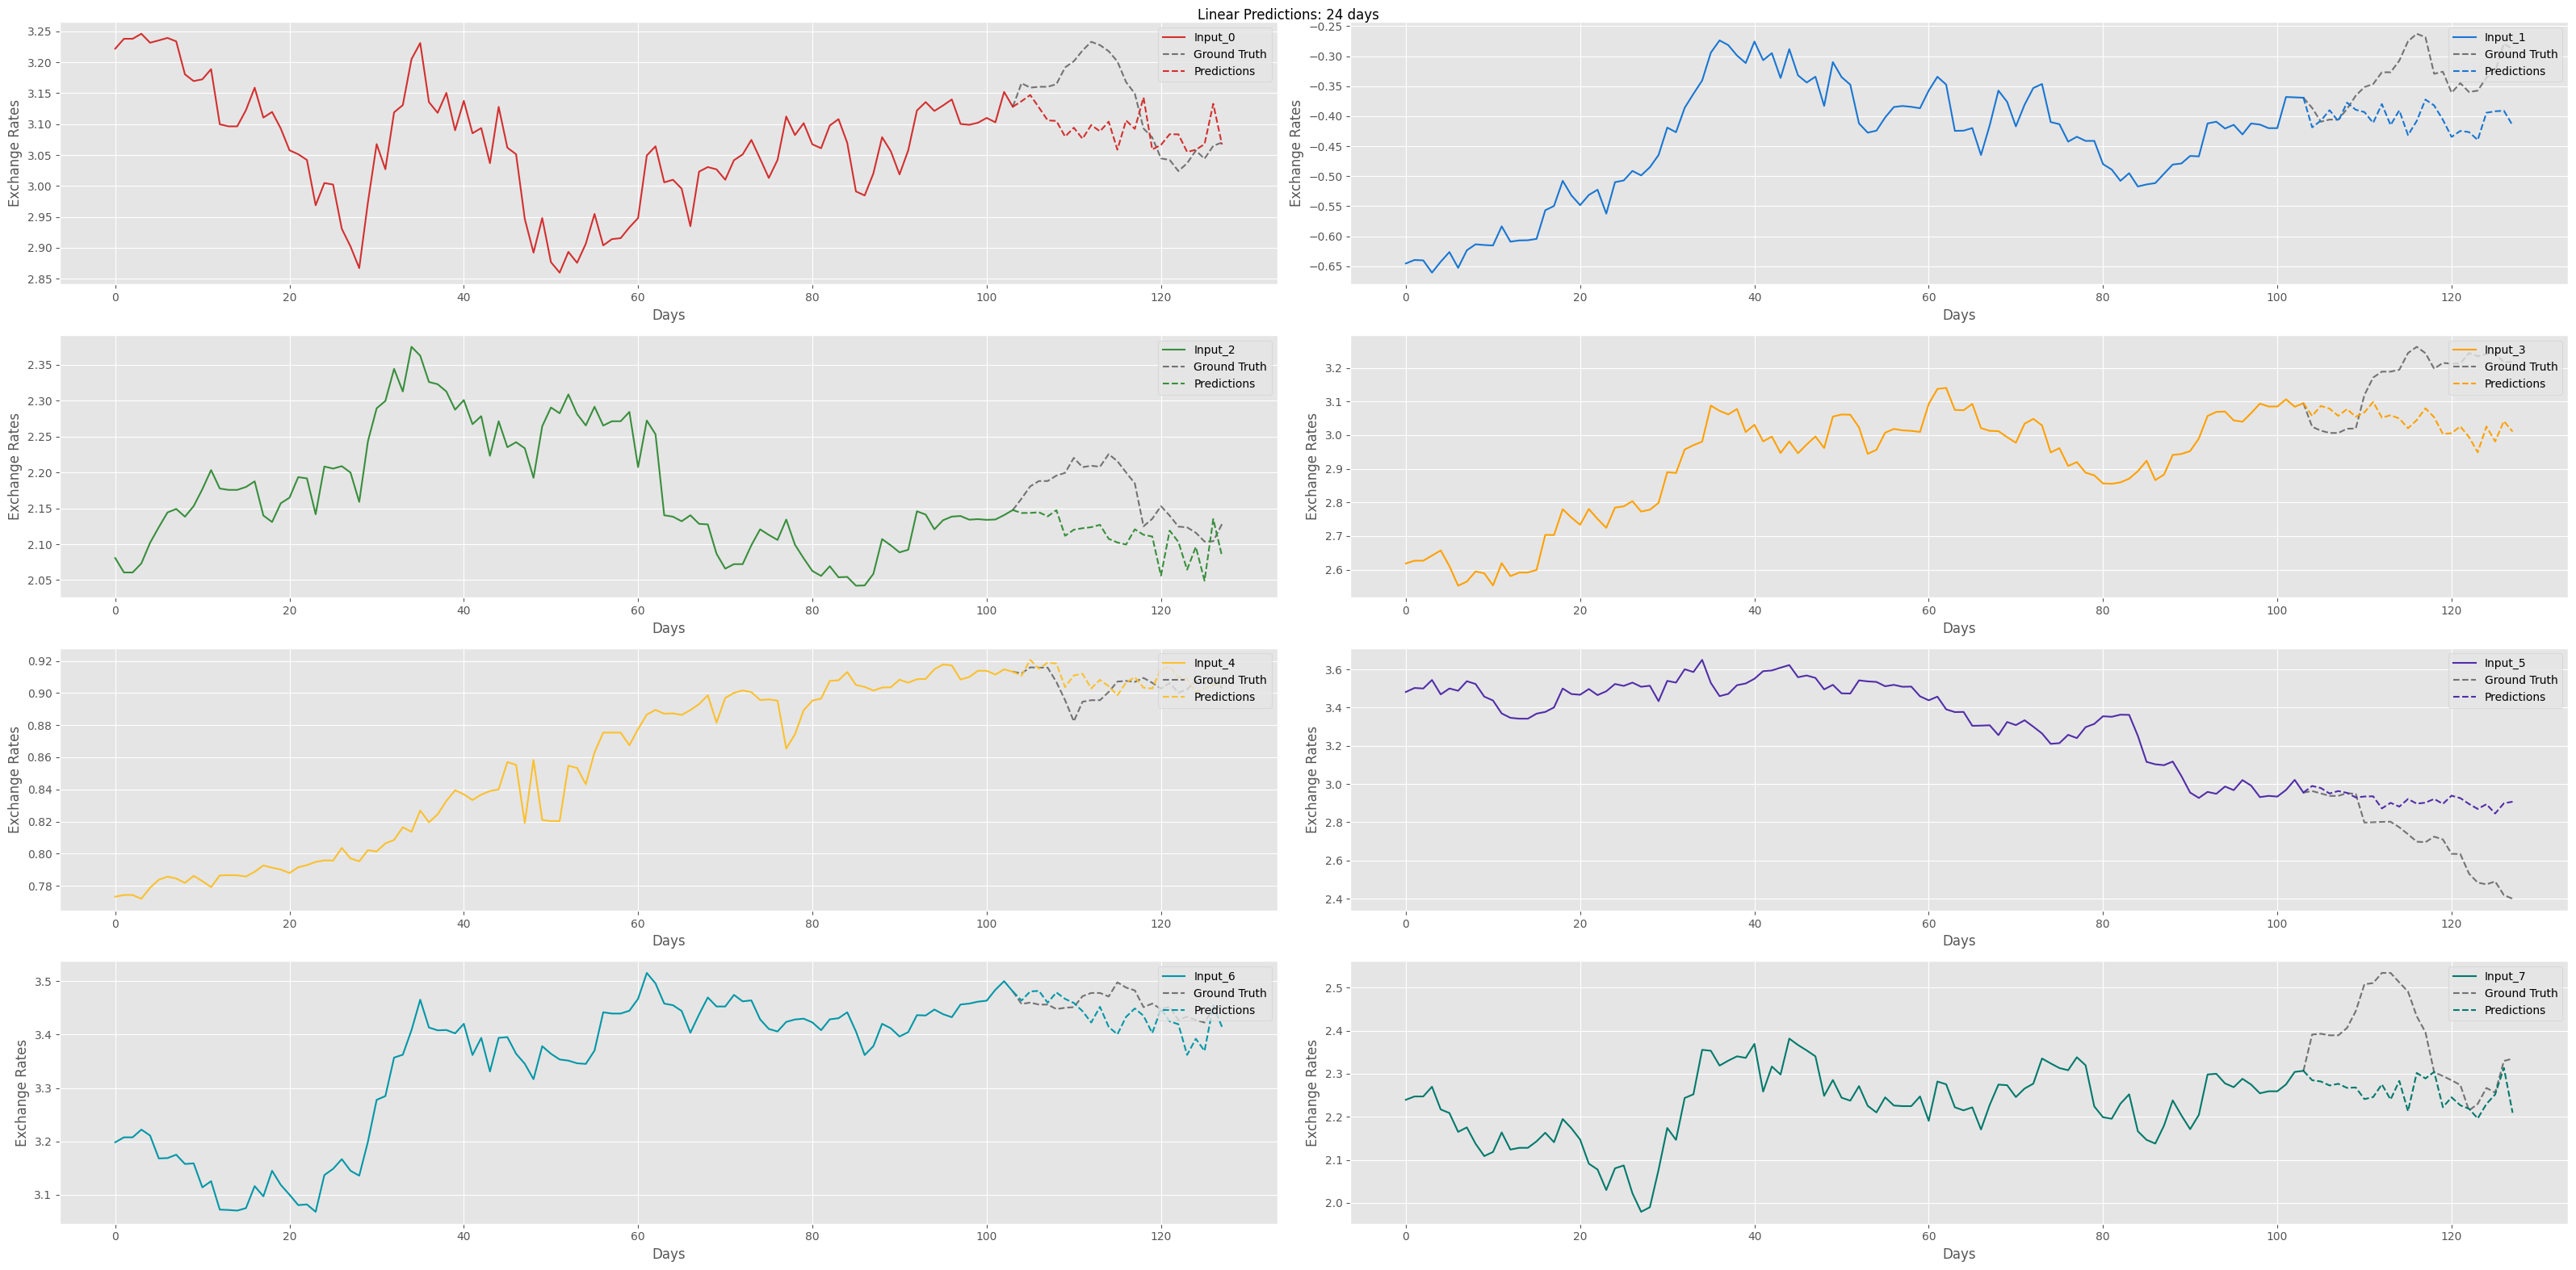

In [8]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][24])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][24])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][24])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 24 days")
plt.show()

### 36 Days

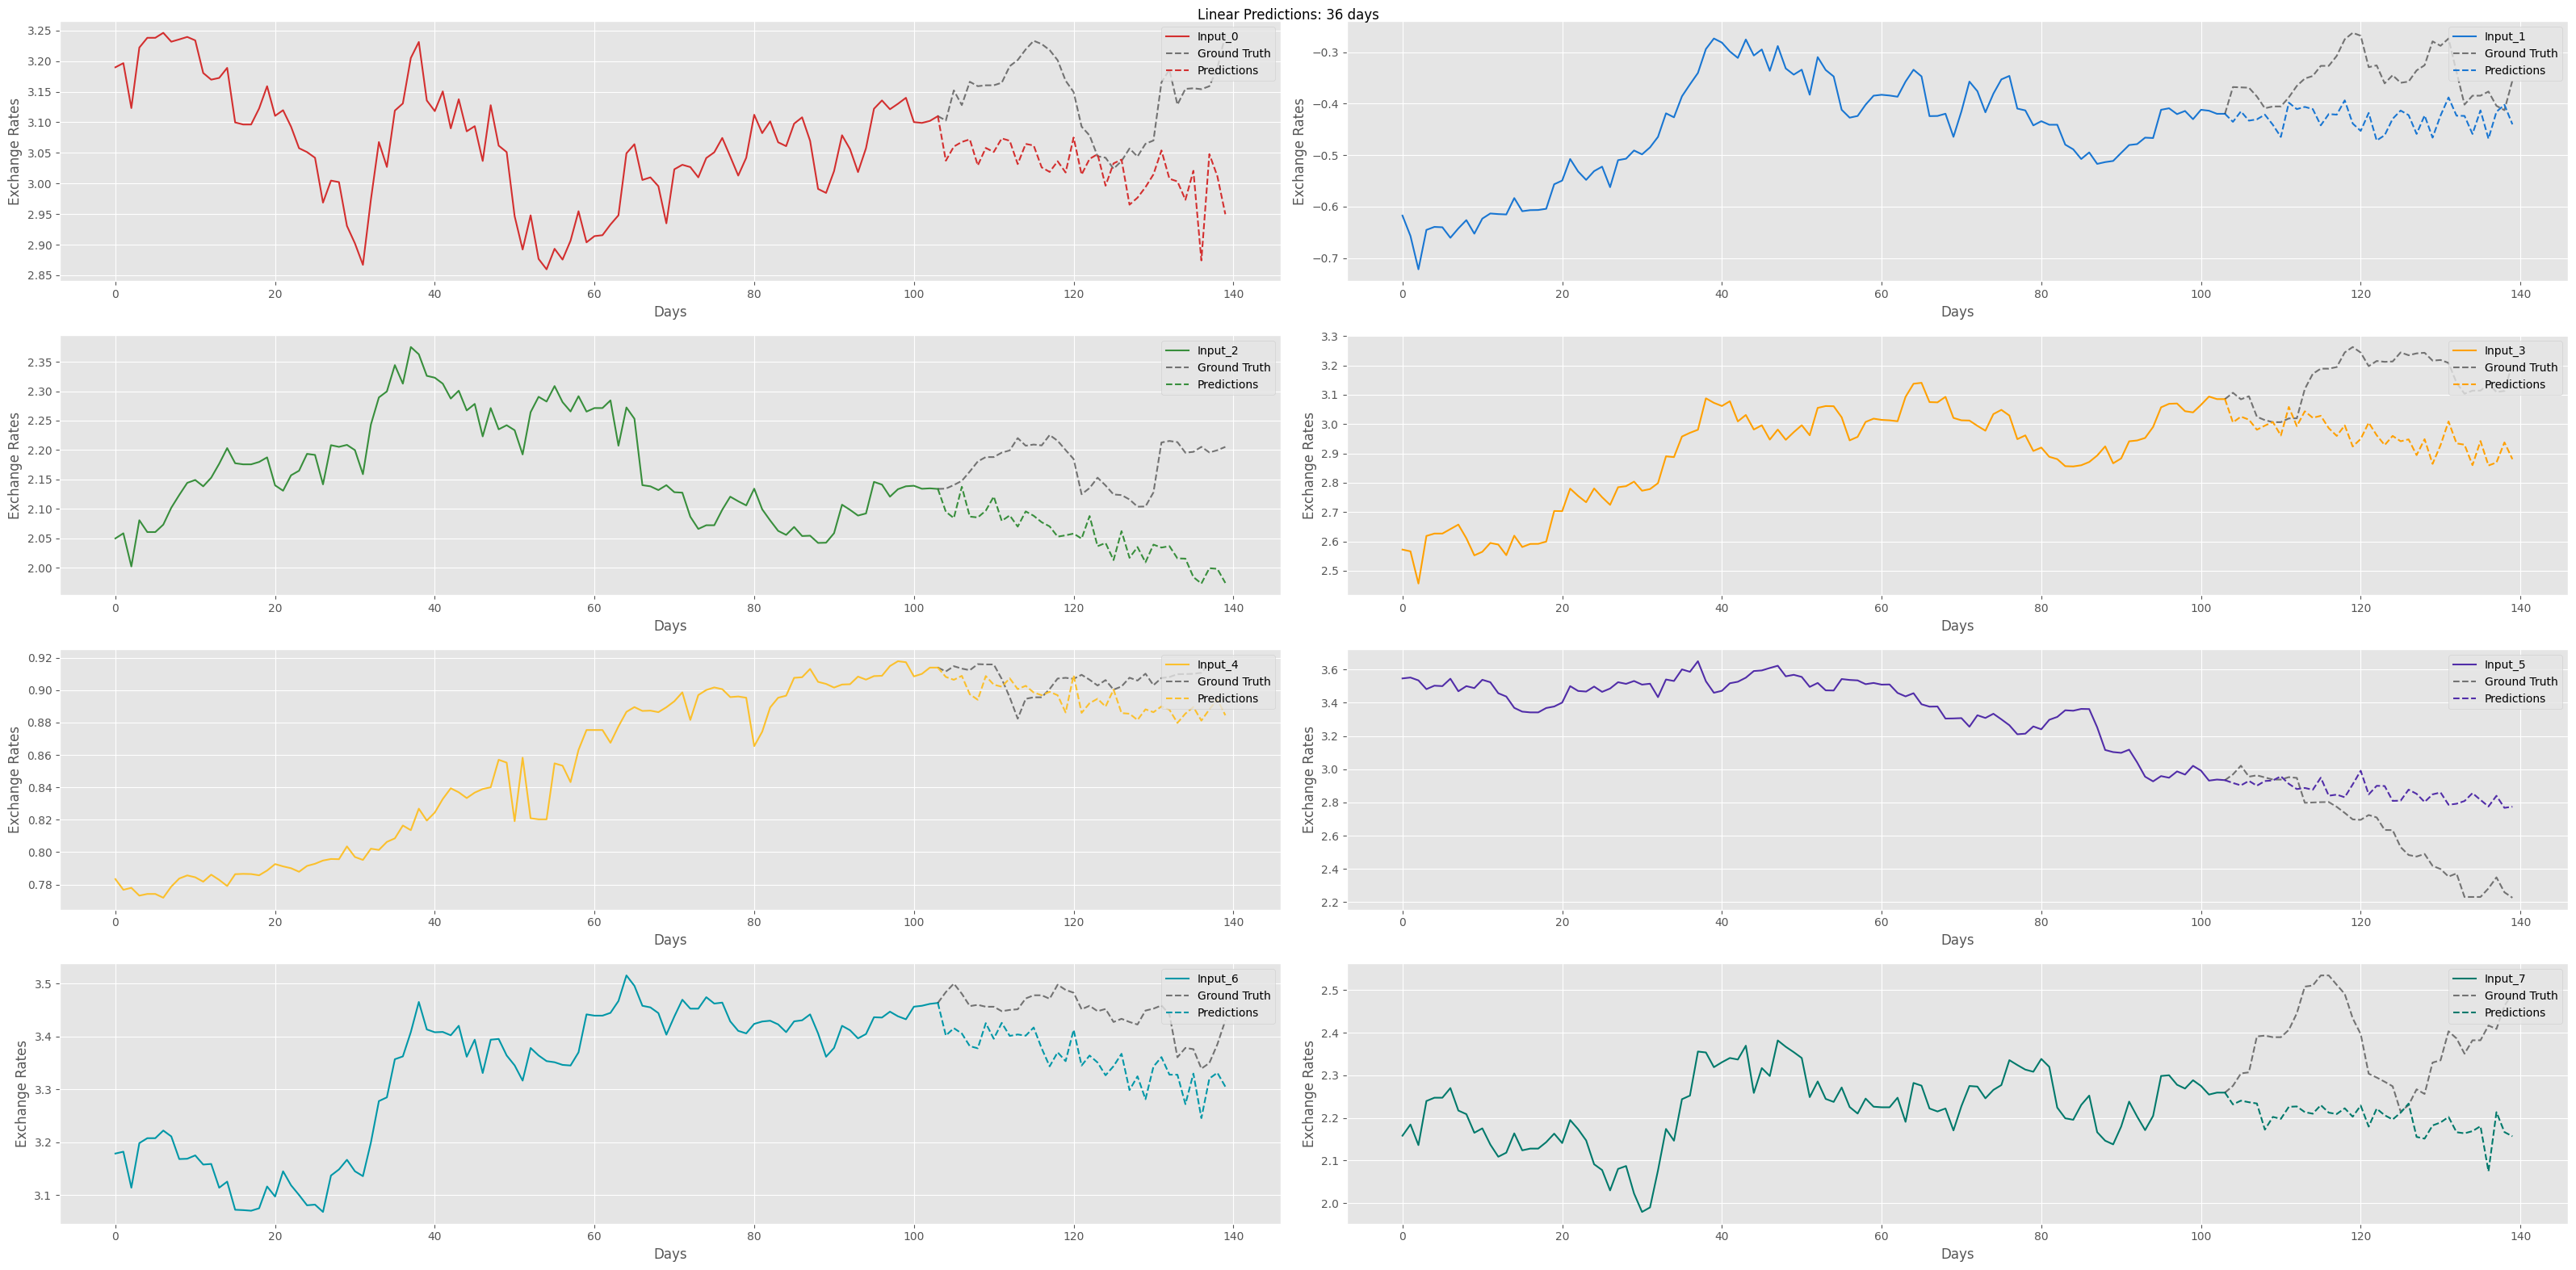

In [9]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][36])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][36])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][36])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 36 days")
plt.show()

### 48 Days

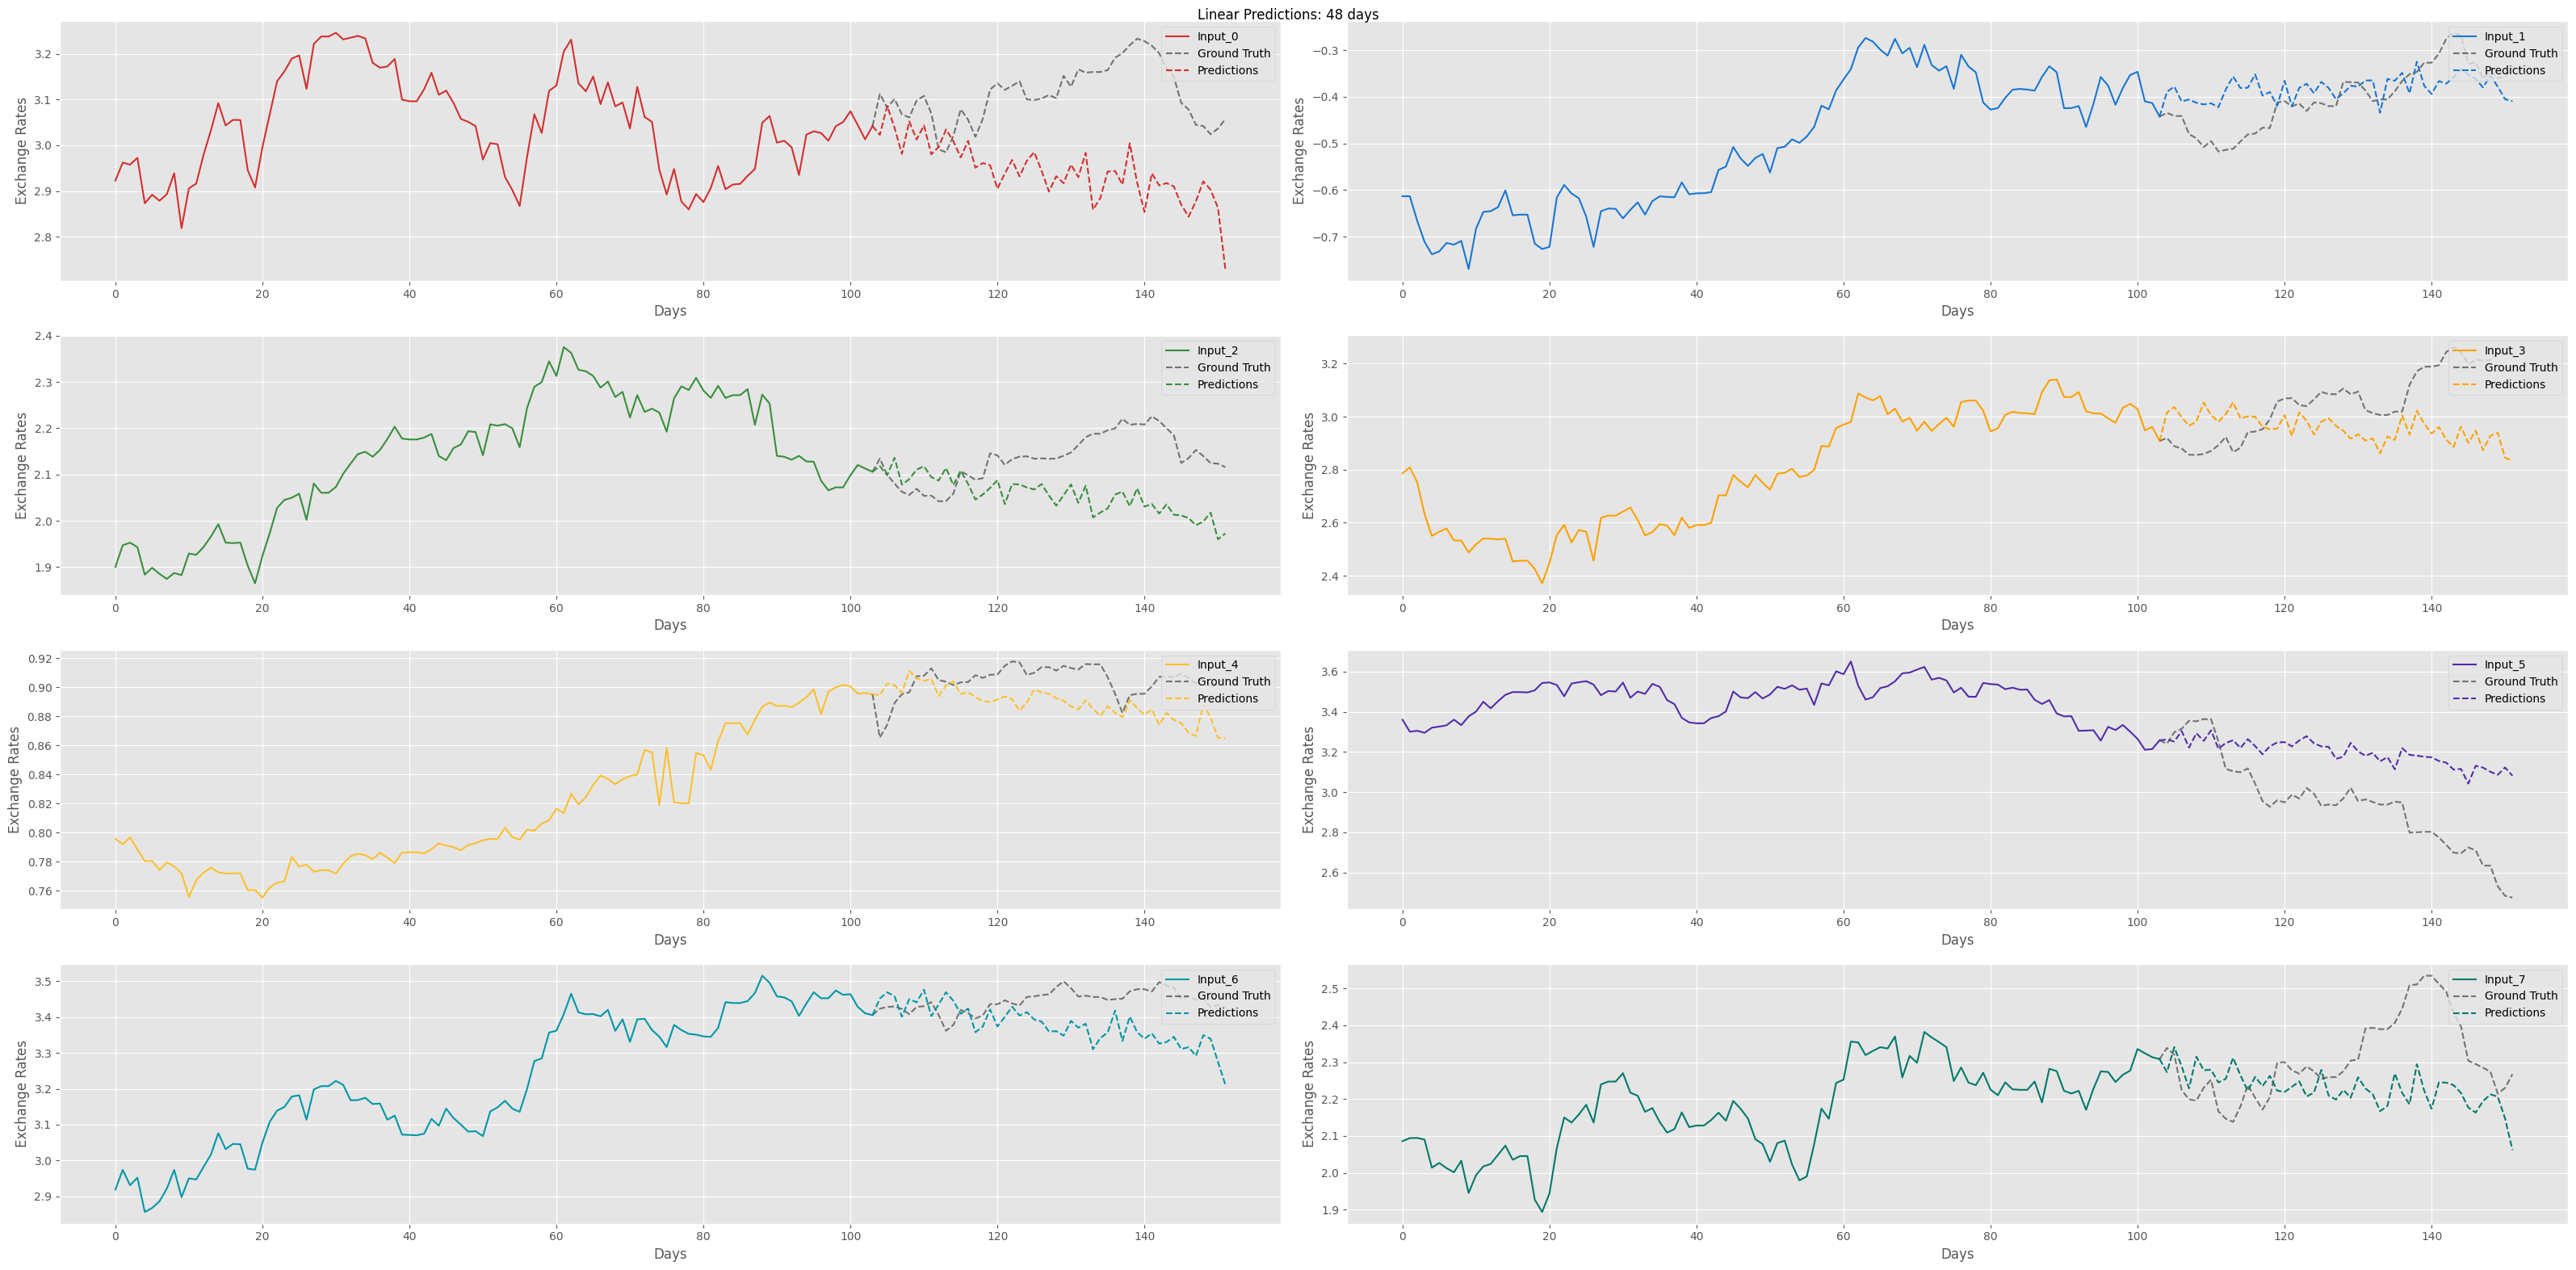

In [10]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][48])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][48])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][48])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 48 days")
plt.show()

### 60 Days

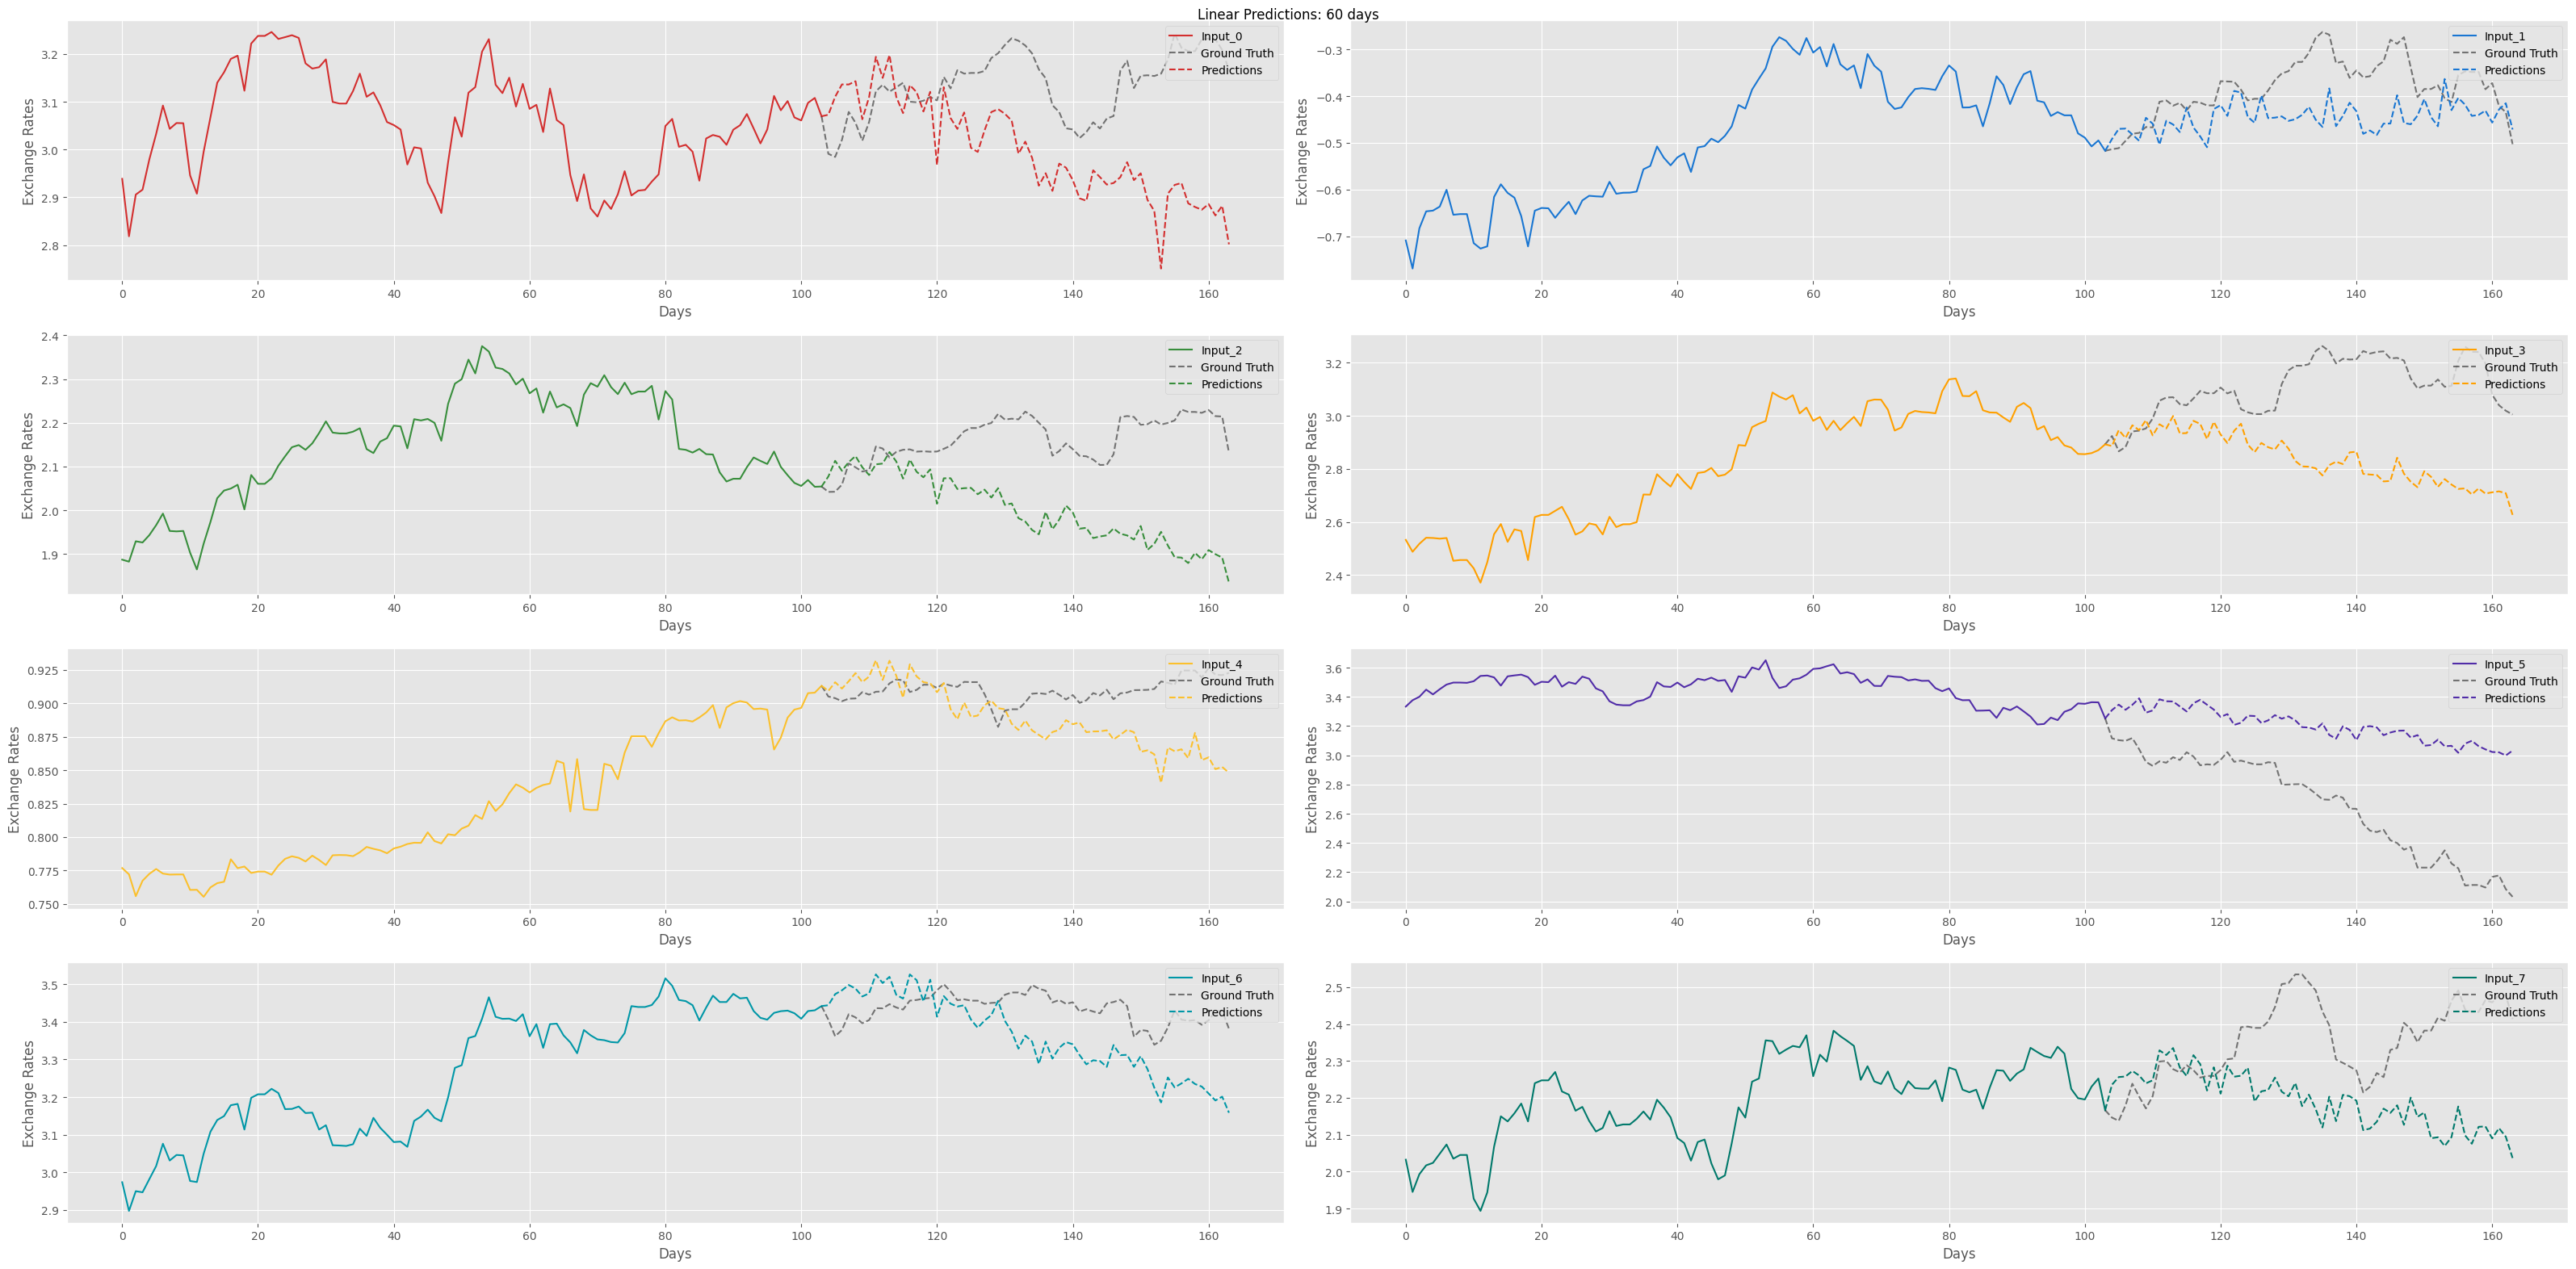

In [11]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][60])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][60])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][60])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 60 days")
plt.show()

### Analysis

Linear model predictions are close to ground-truth up to 36 days, then diverges.


## DLinear Predictions

### 24 Days

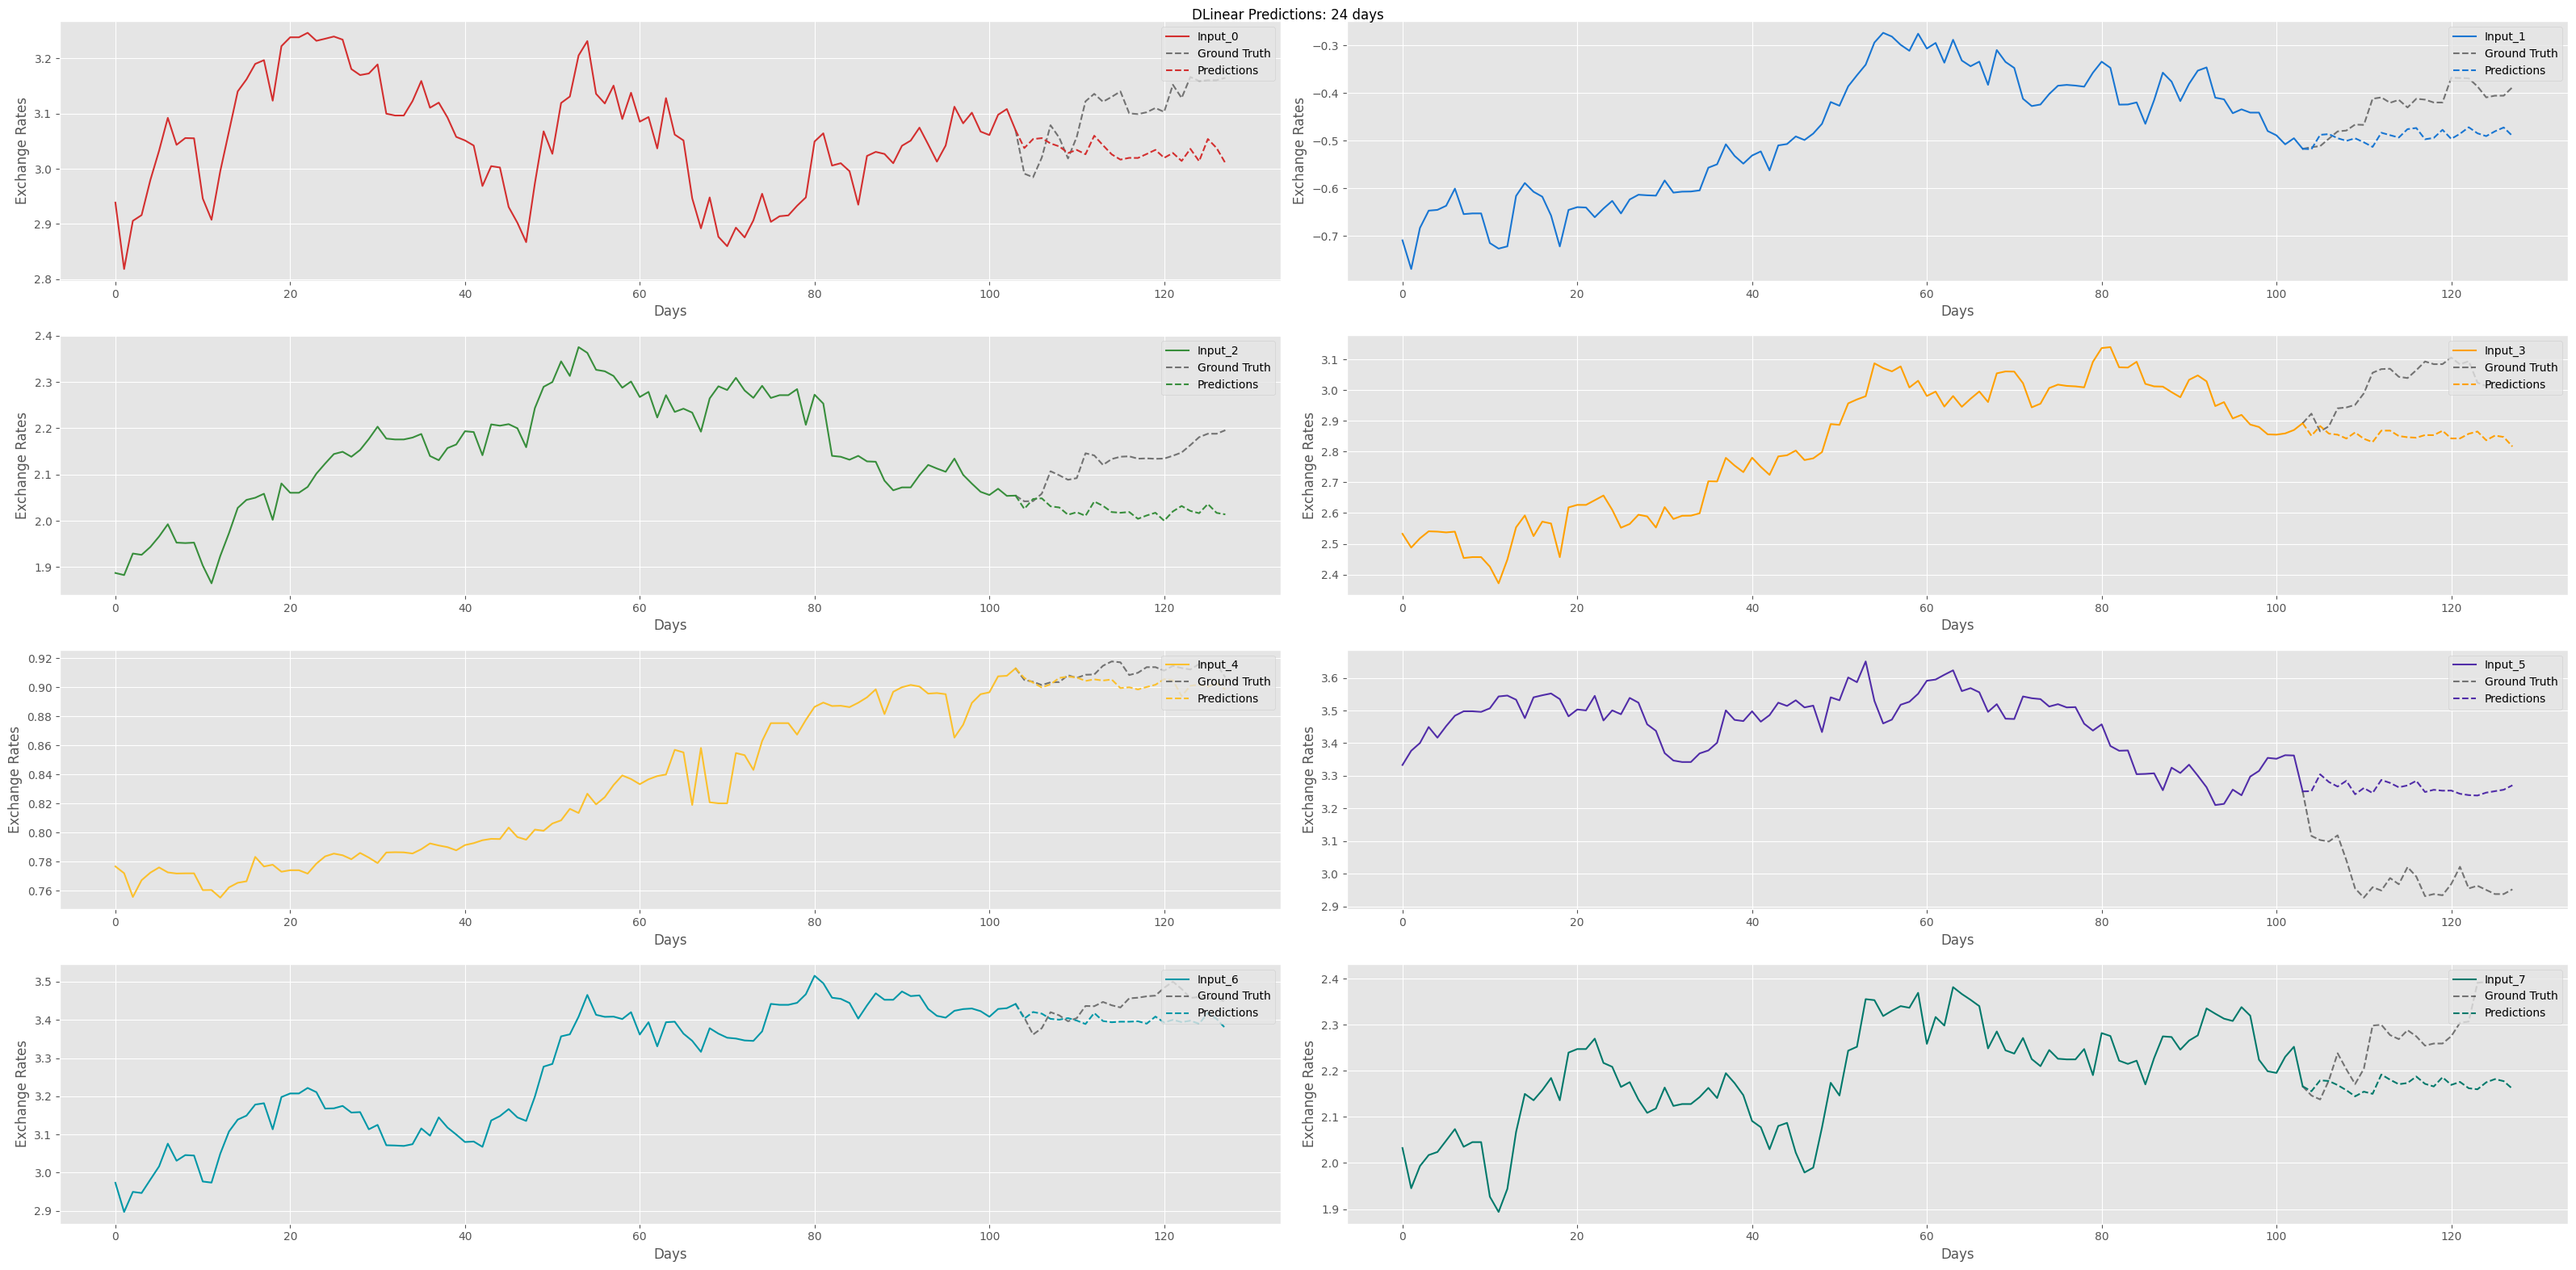

In [12]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][24])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][24])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][24])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 24 days")
plt.show()

### 36 Days

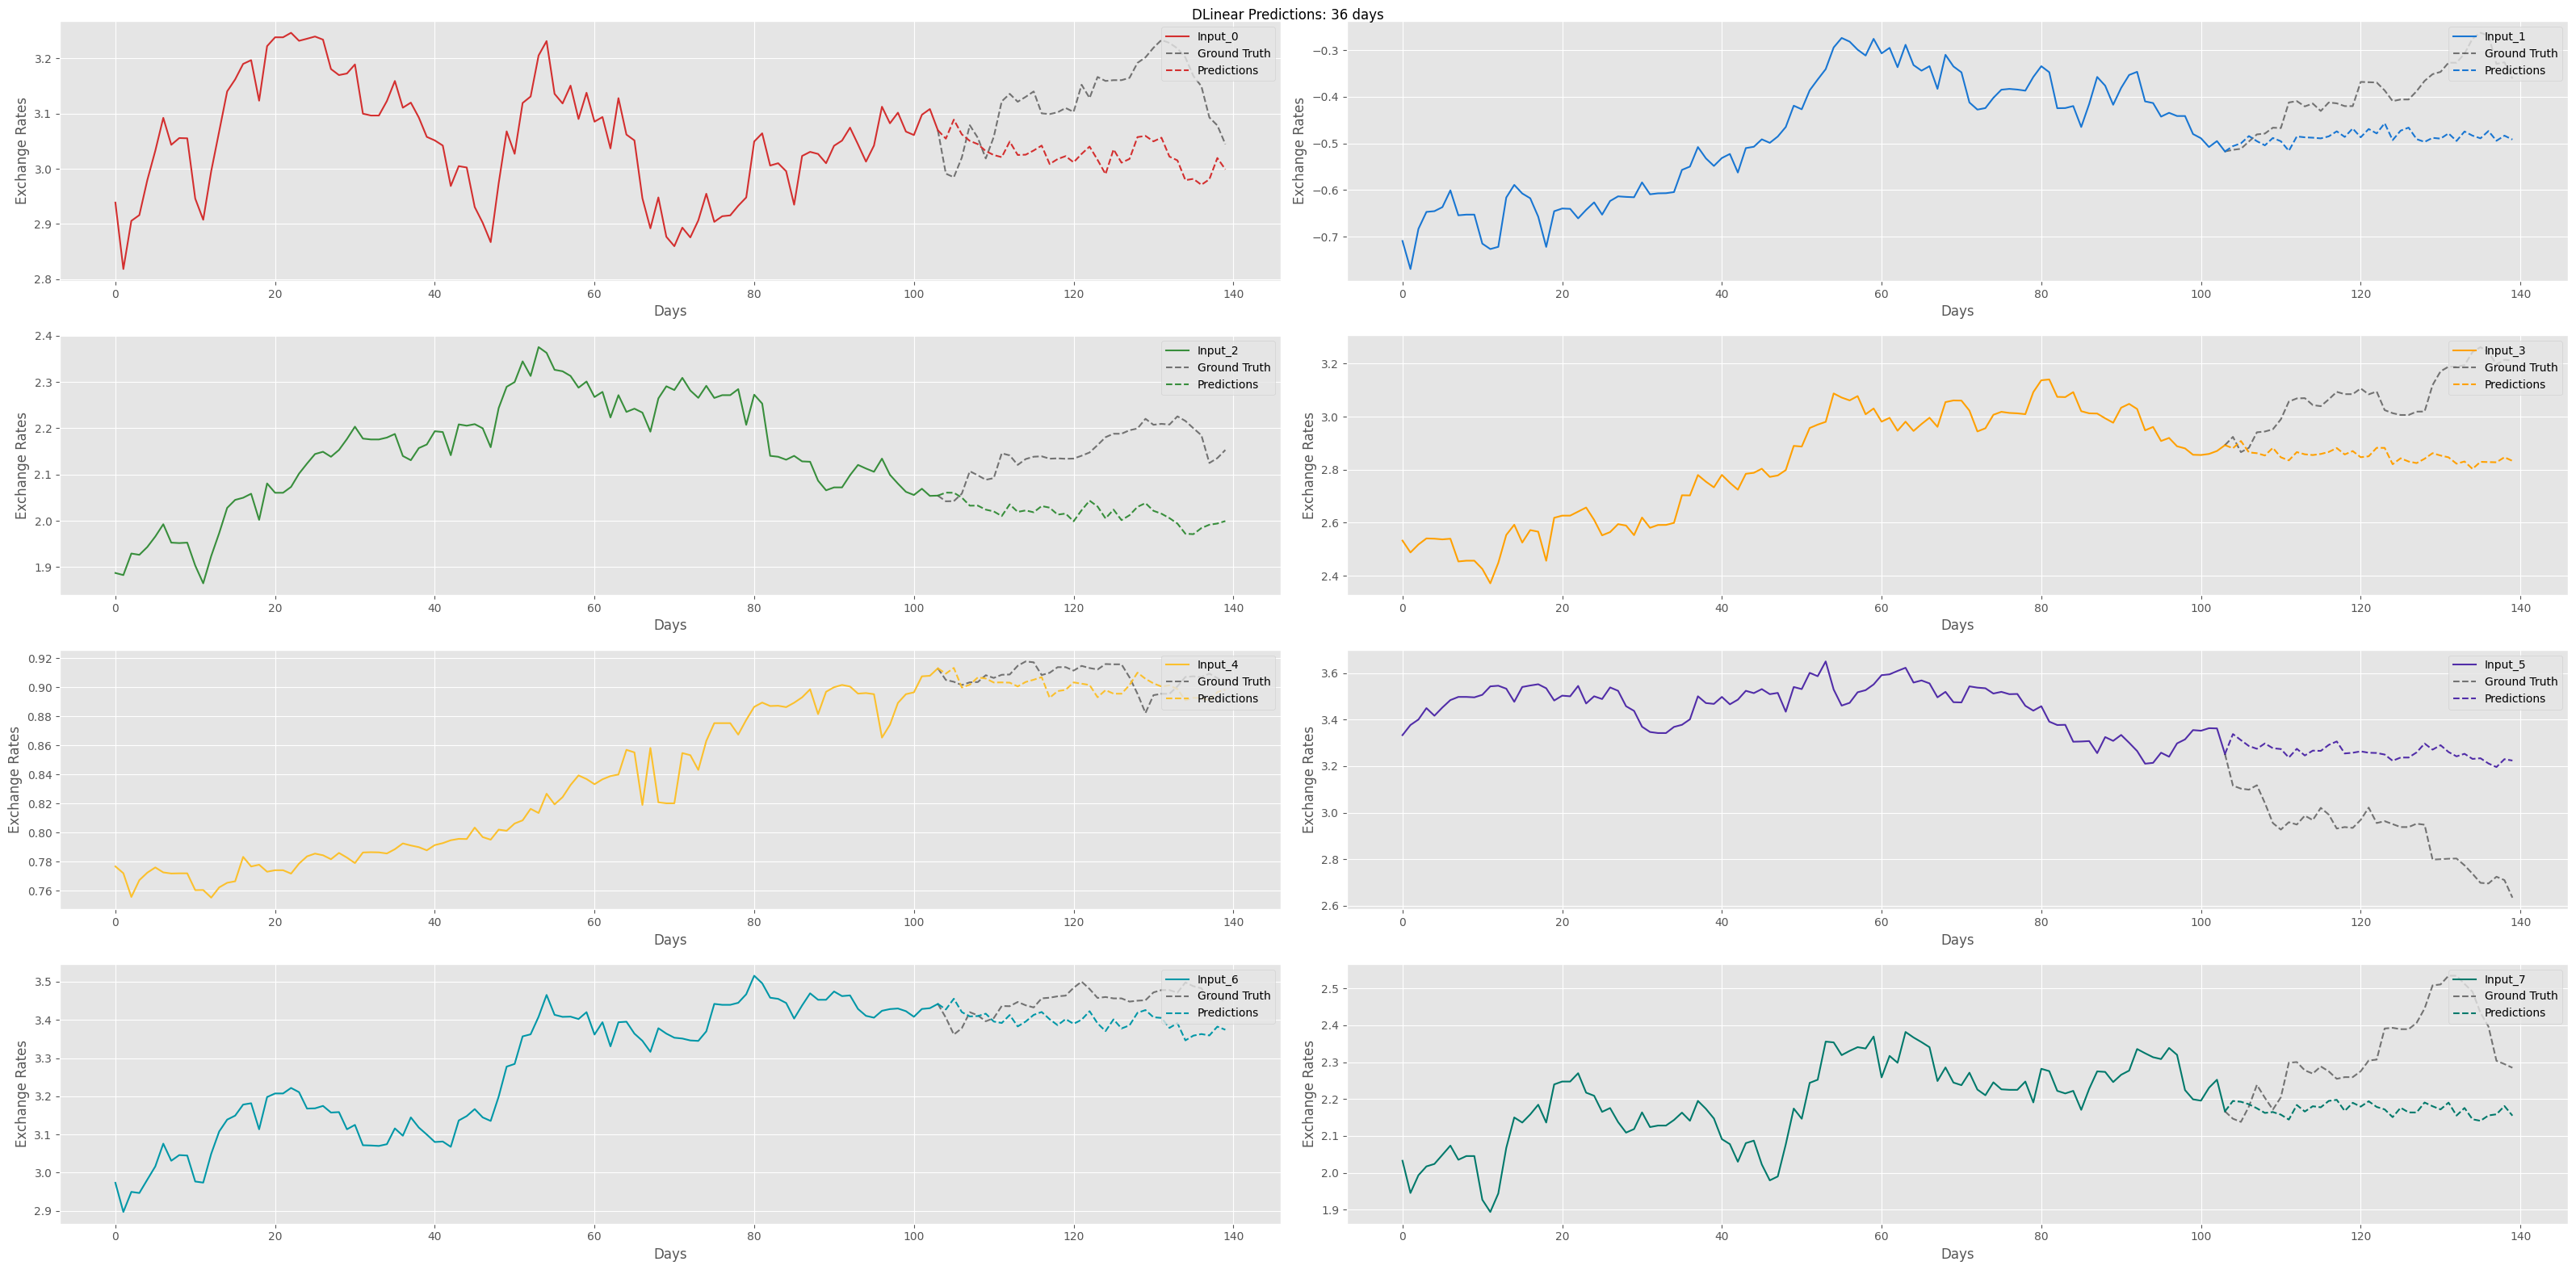

In [13]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][36])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][36])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][36])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 36 days")
plt.show()

### 48 Days

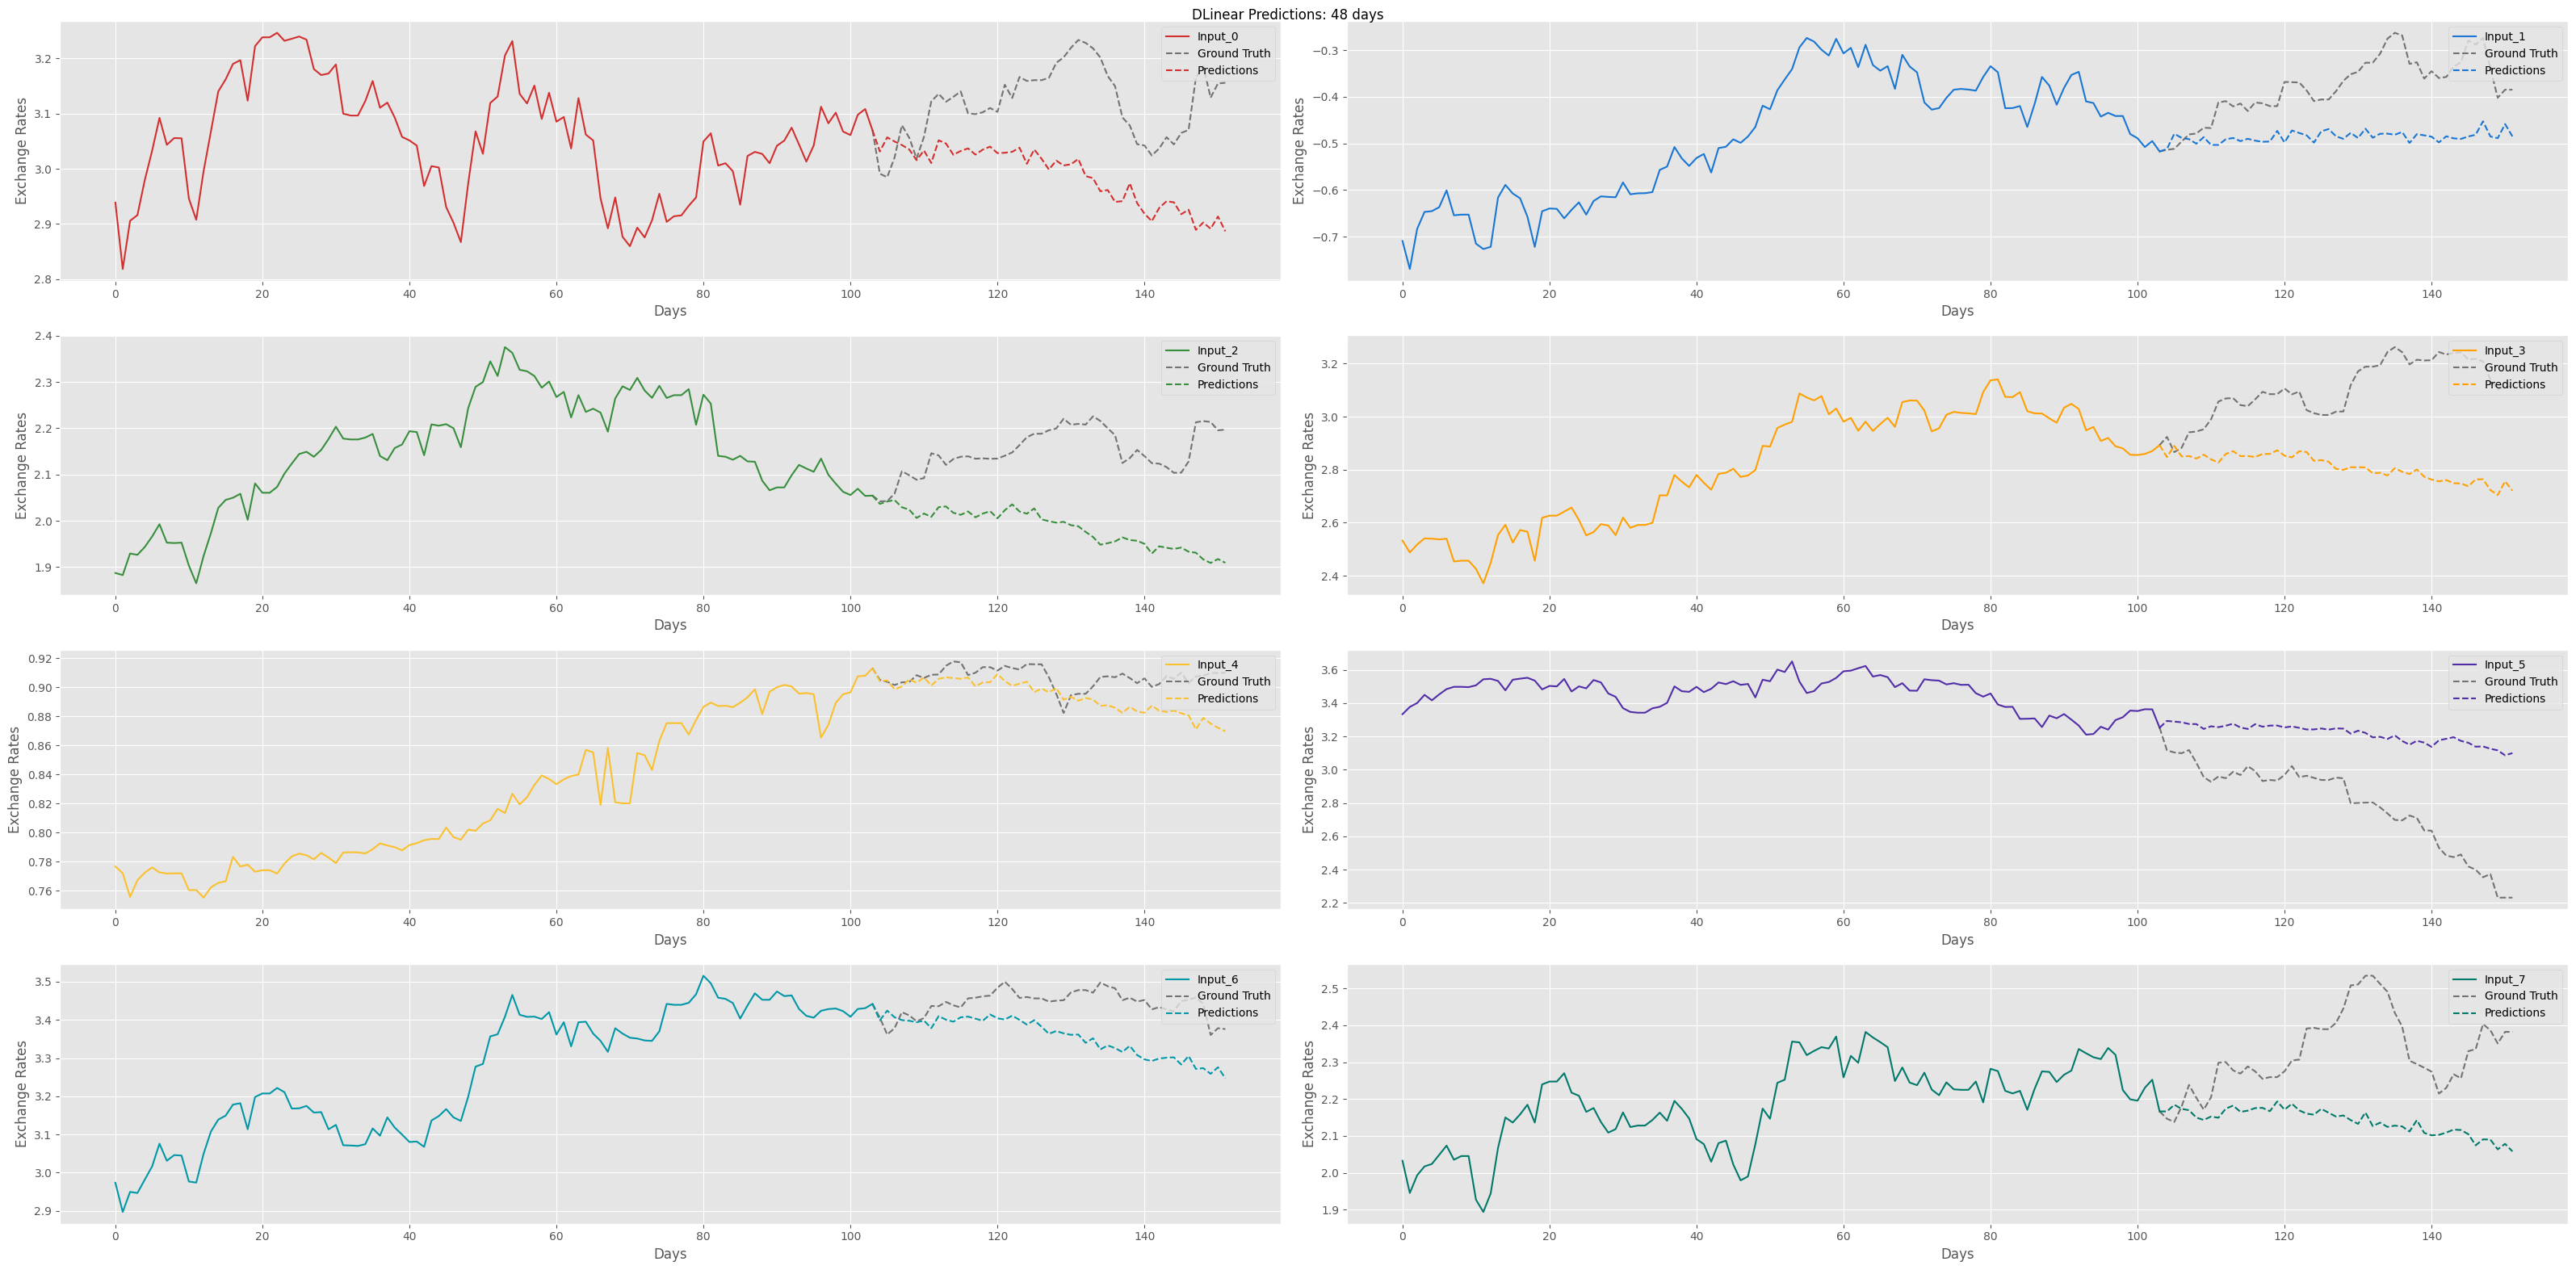

In [14]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][48])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][48])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][48])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 48 days")
plt.show()

### 60 Days

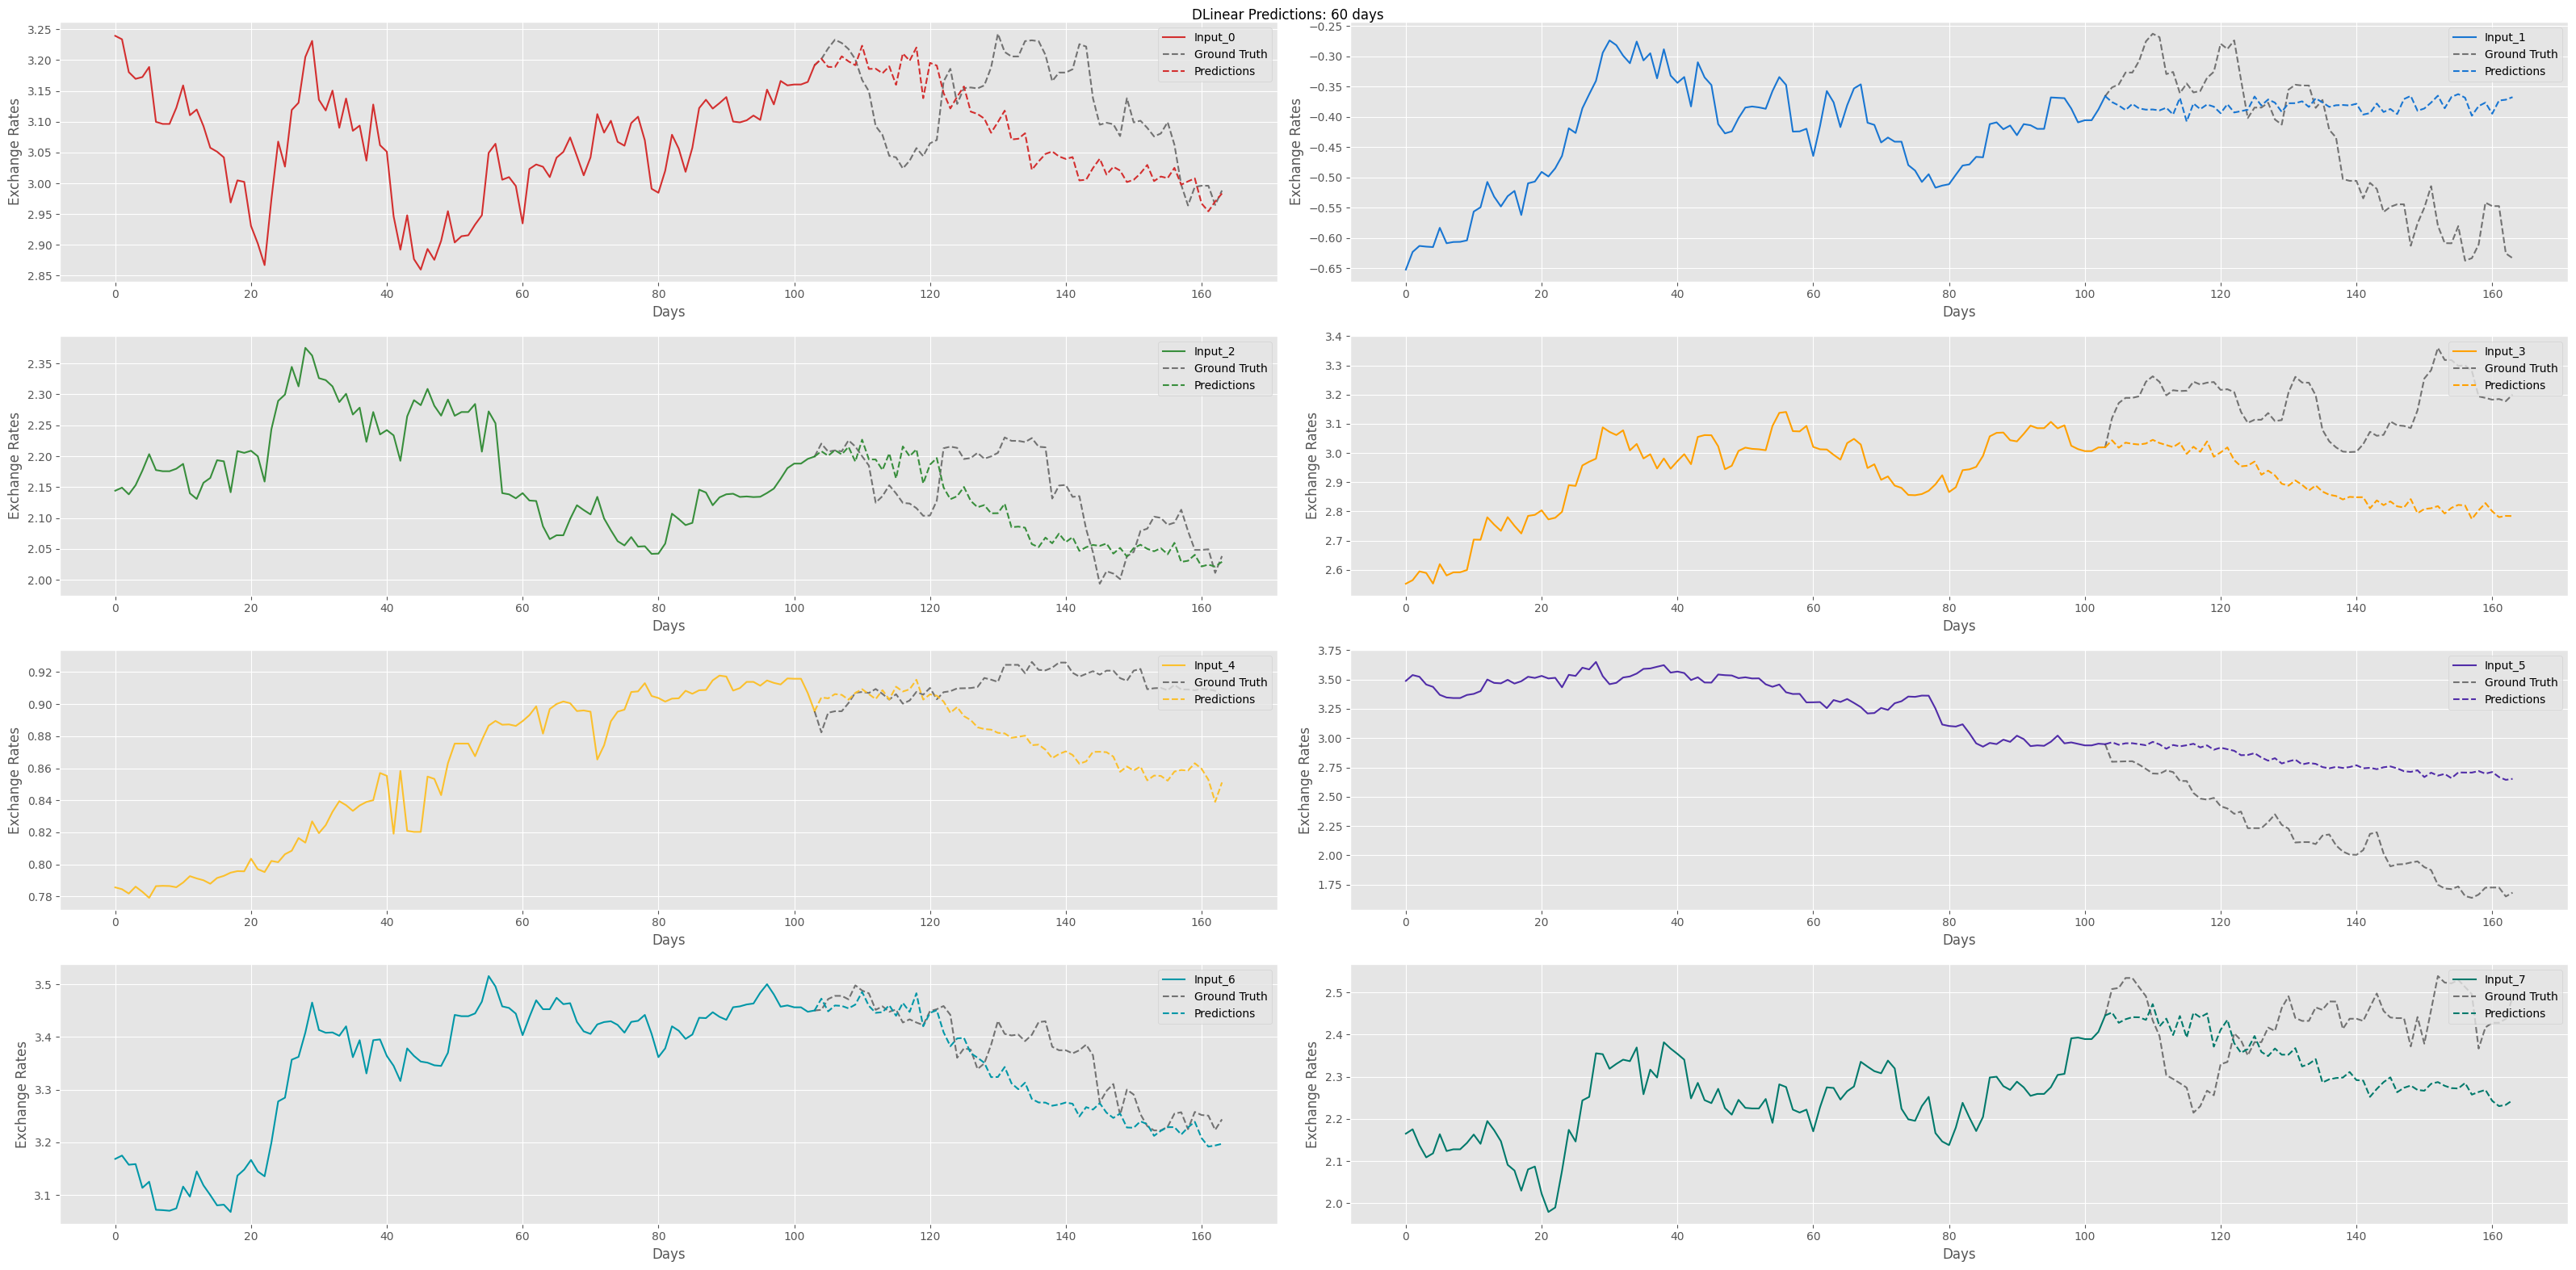

In [15]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][60])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][60])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][60])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = 50

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 60 days")
plt.show()

### Analysis

DLinear model predictions are close to ground-truth up to 36 days. Beyond this point, predictions for some multivariates are good up to 48 days, while for others, it diverges.

## NLinear Predictions

### 24 Days

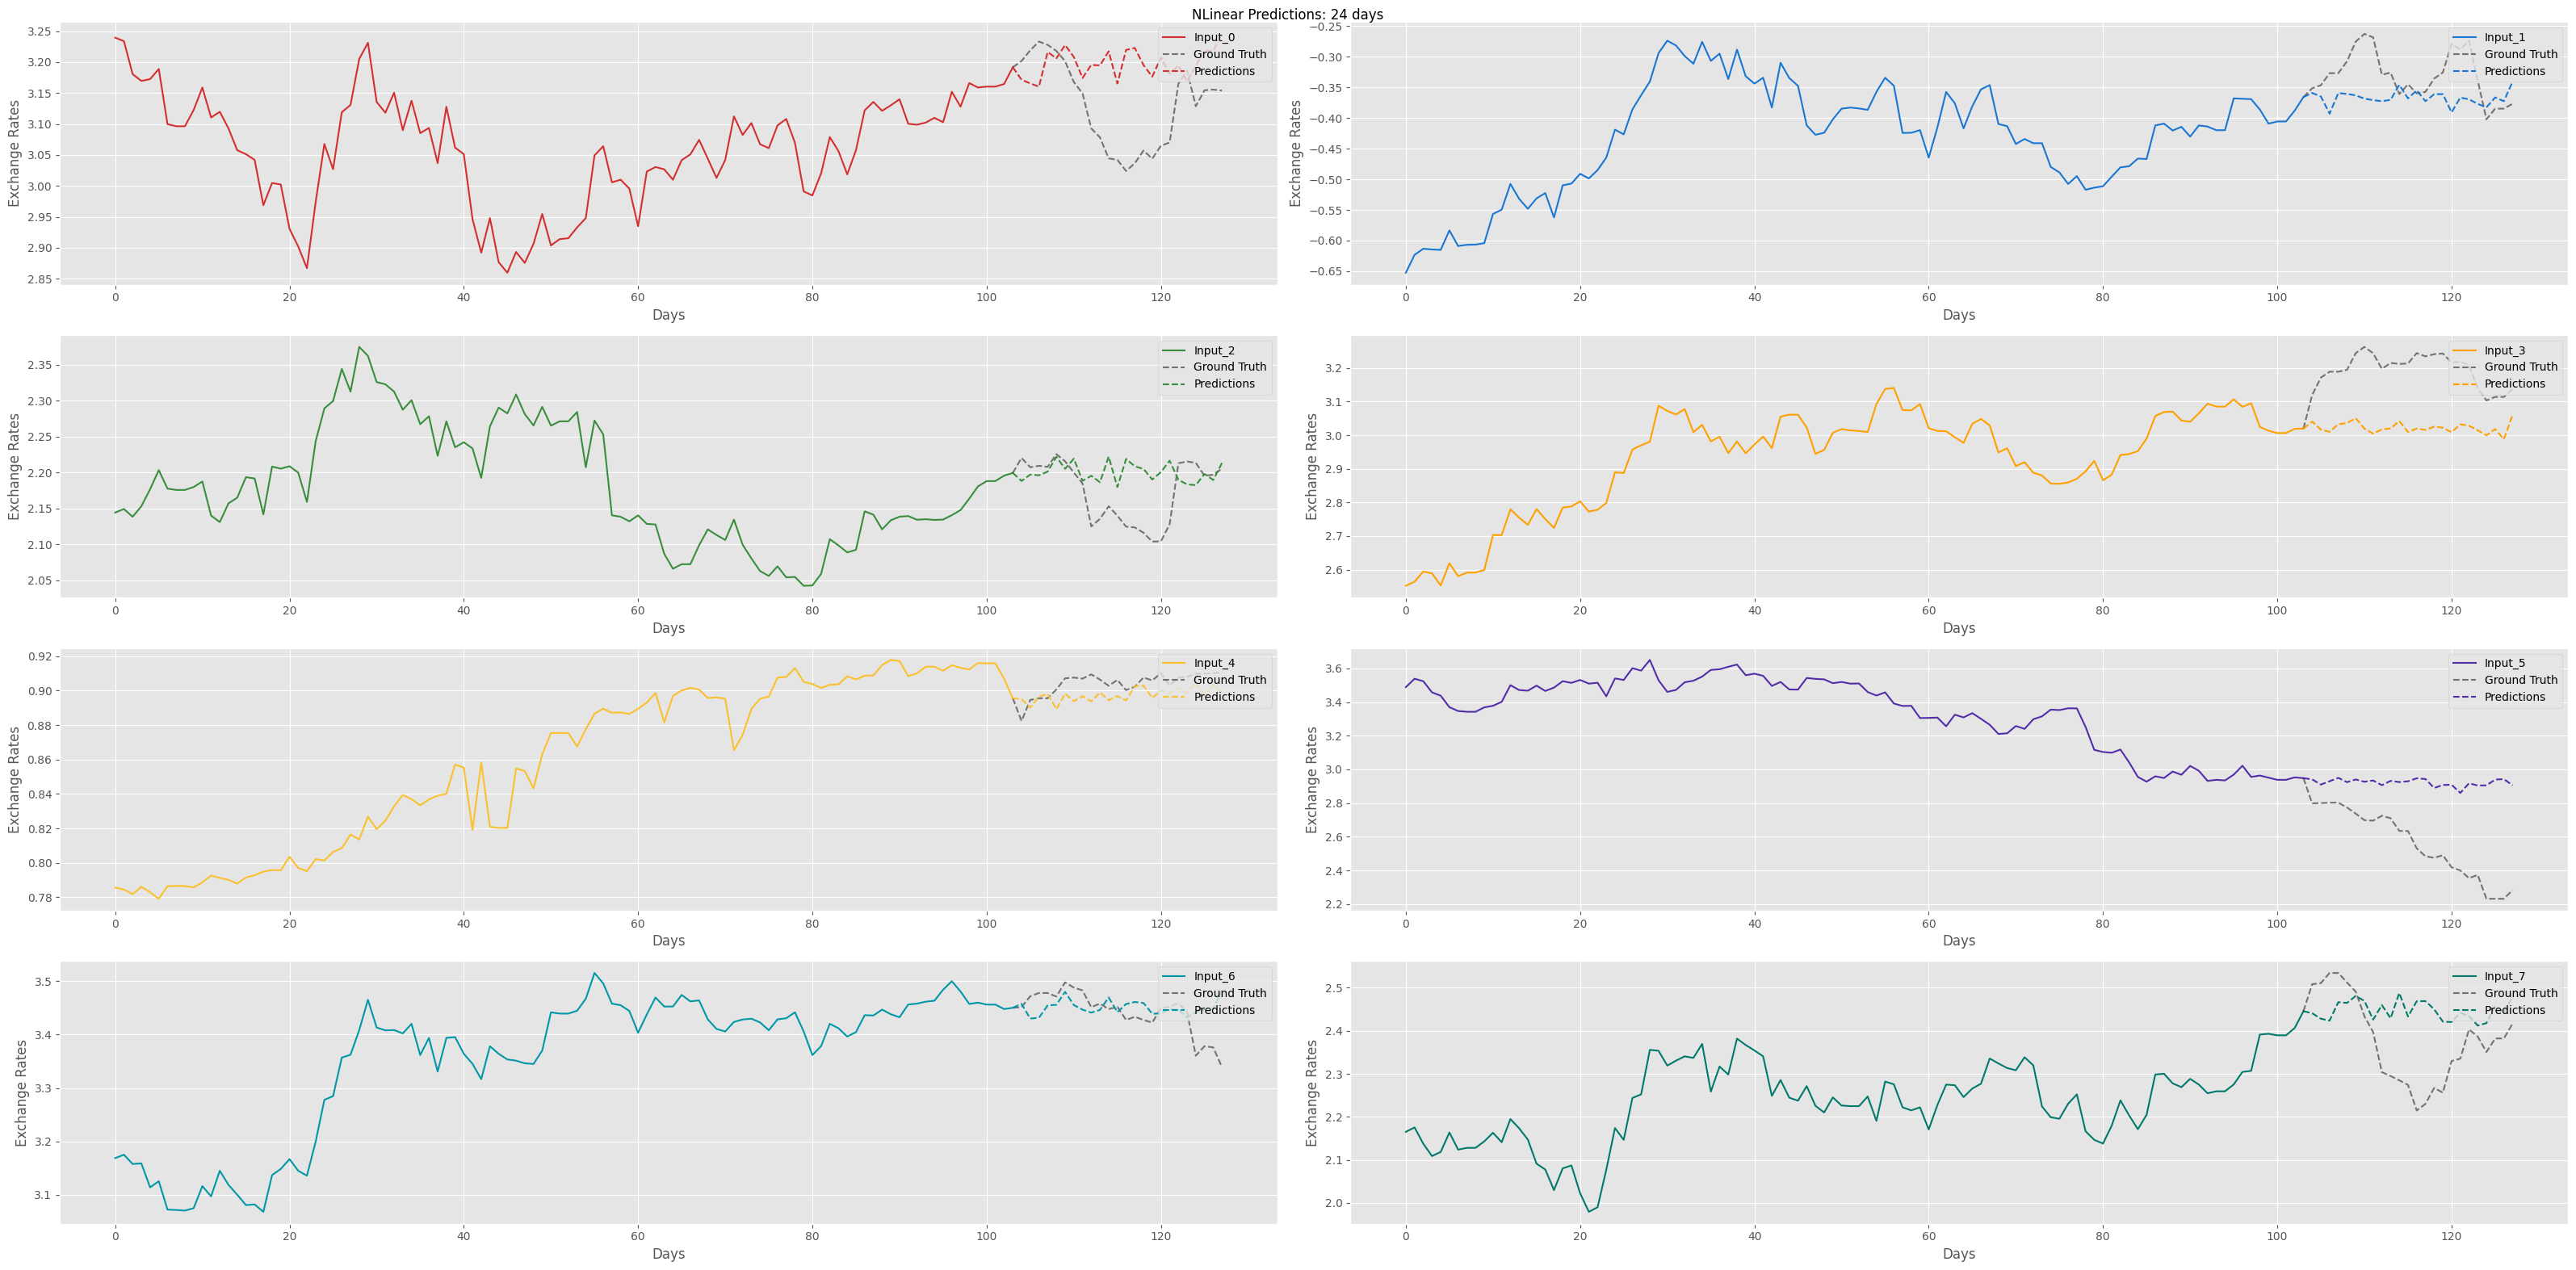

In [16]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][24])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][24])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][24])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 24 days")
plt.show()

### 36 Days

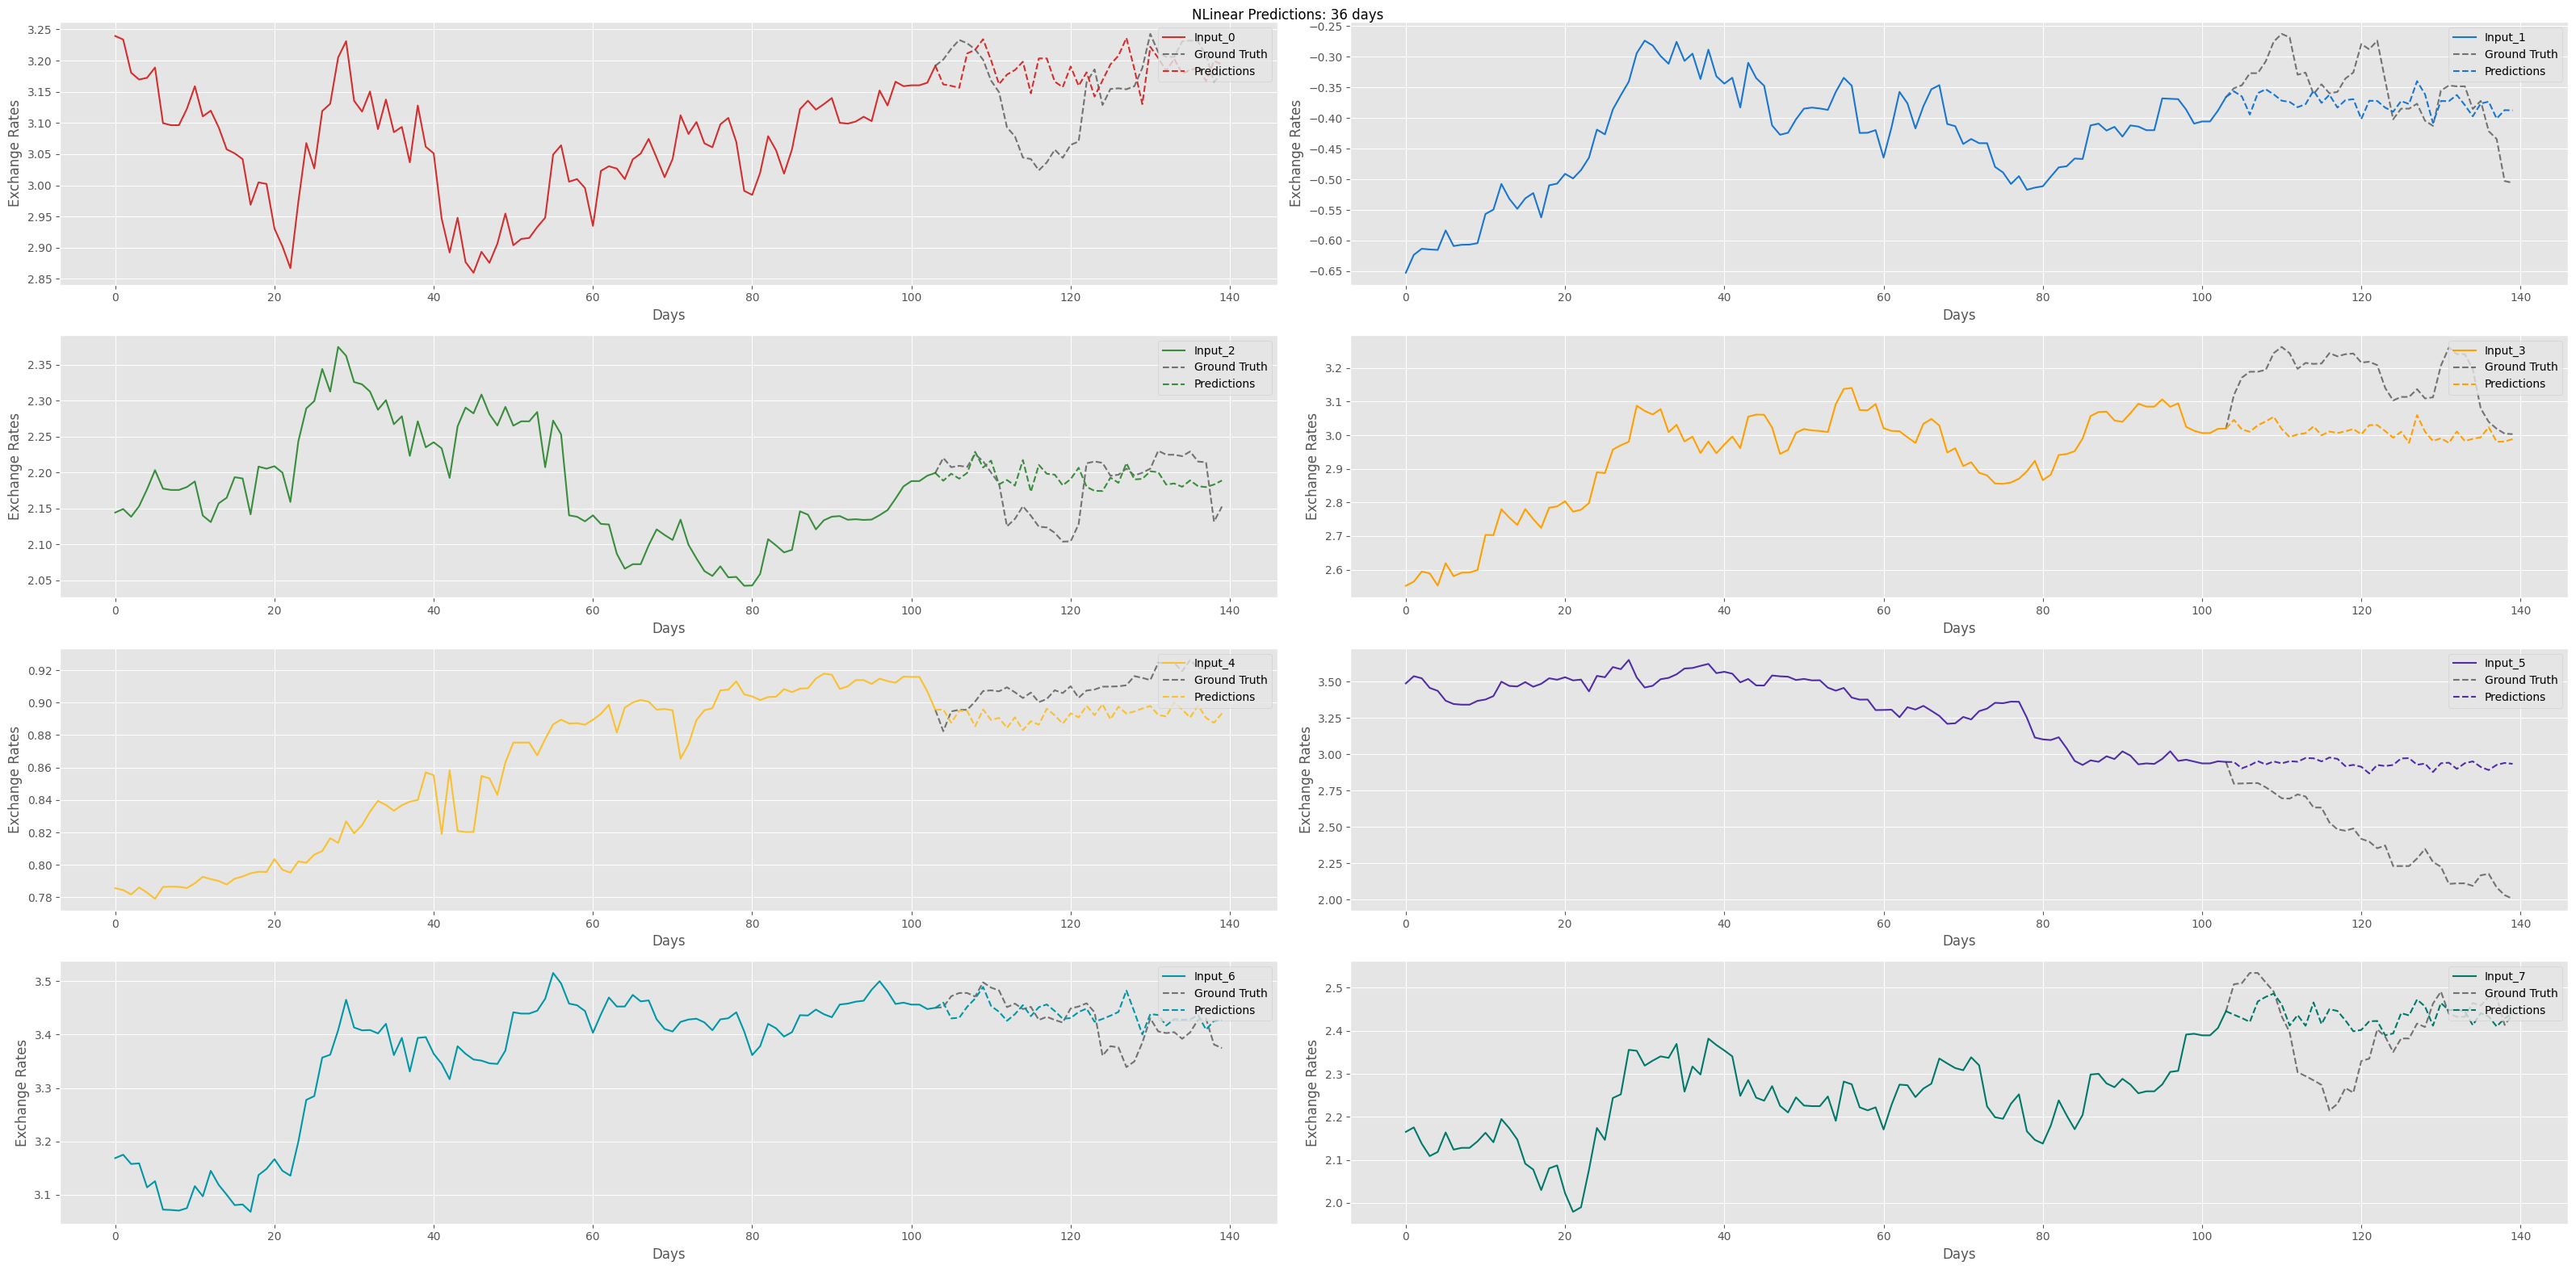

In [17]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][36])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][36])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][36])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 36 days")
plt.show()

### 48 Days

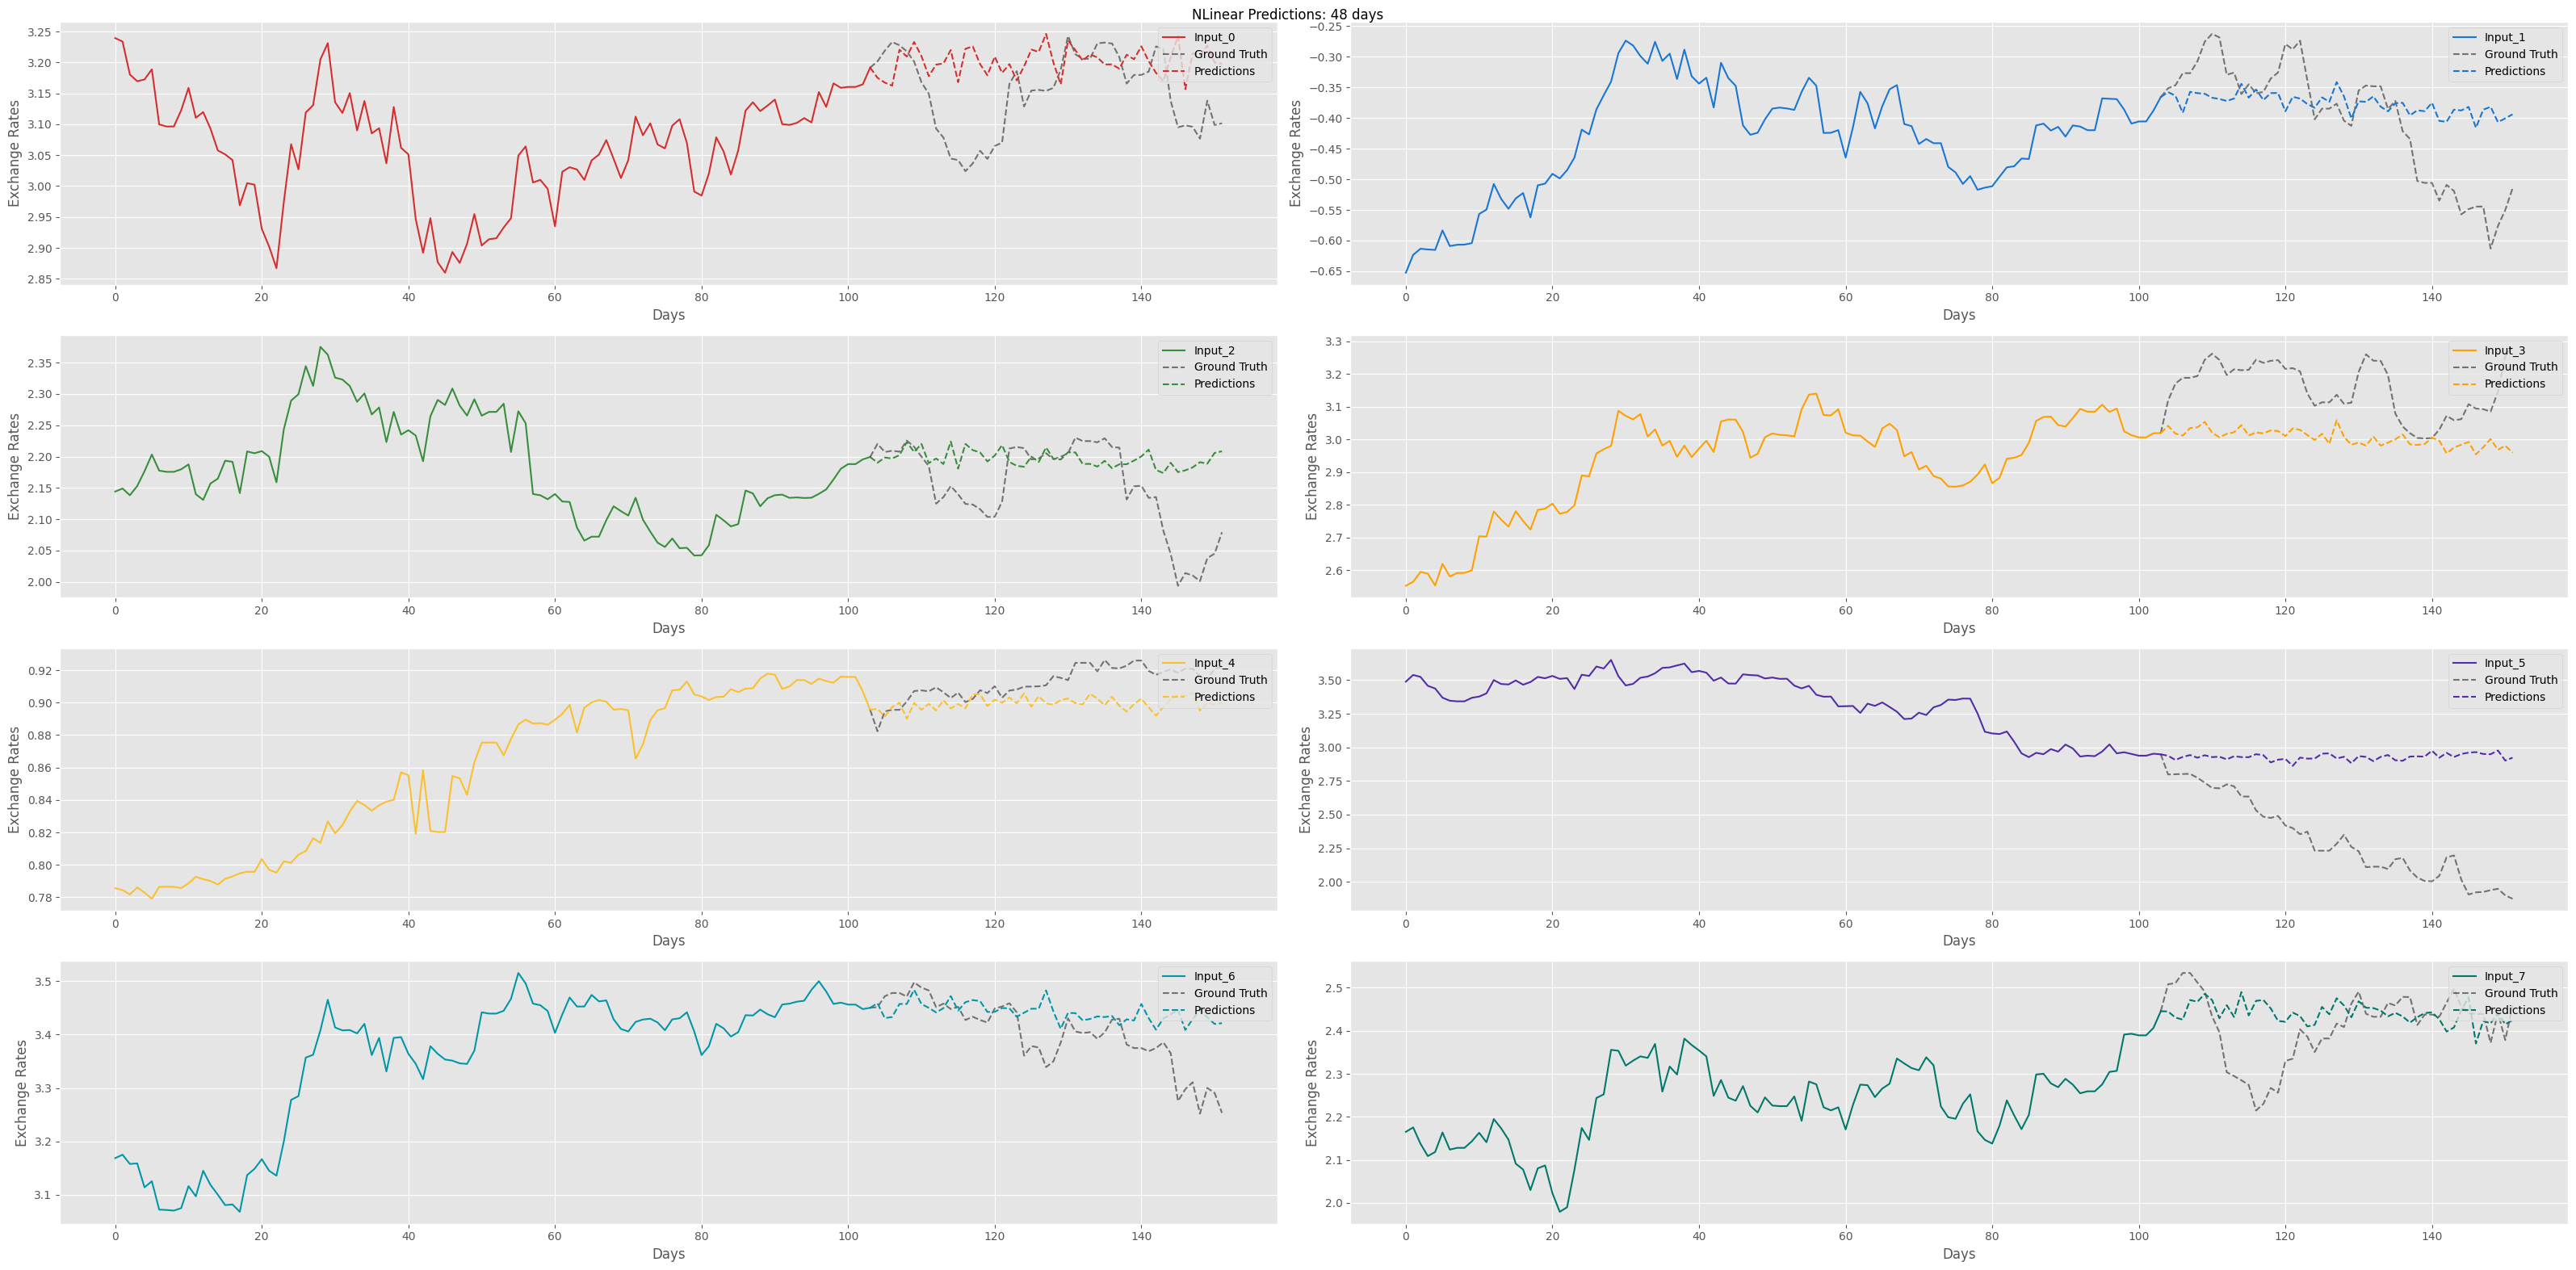

In [18]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][48])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][48])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][48])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 48 days")
plt.show()

### 60 Days

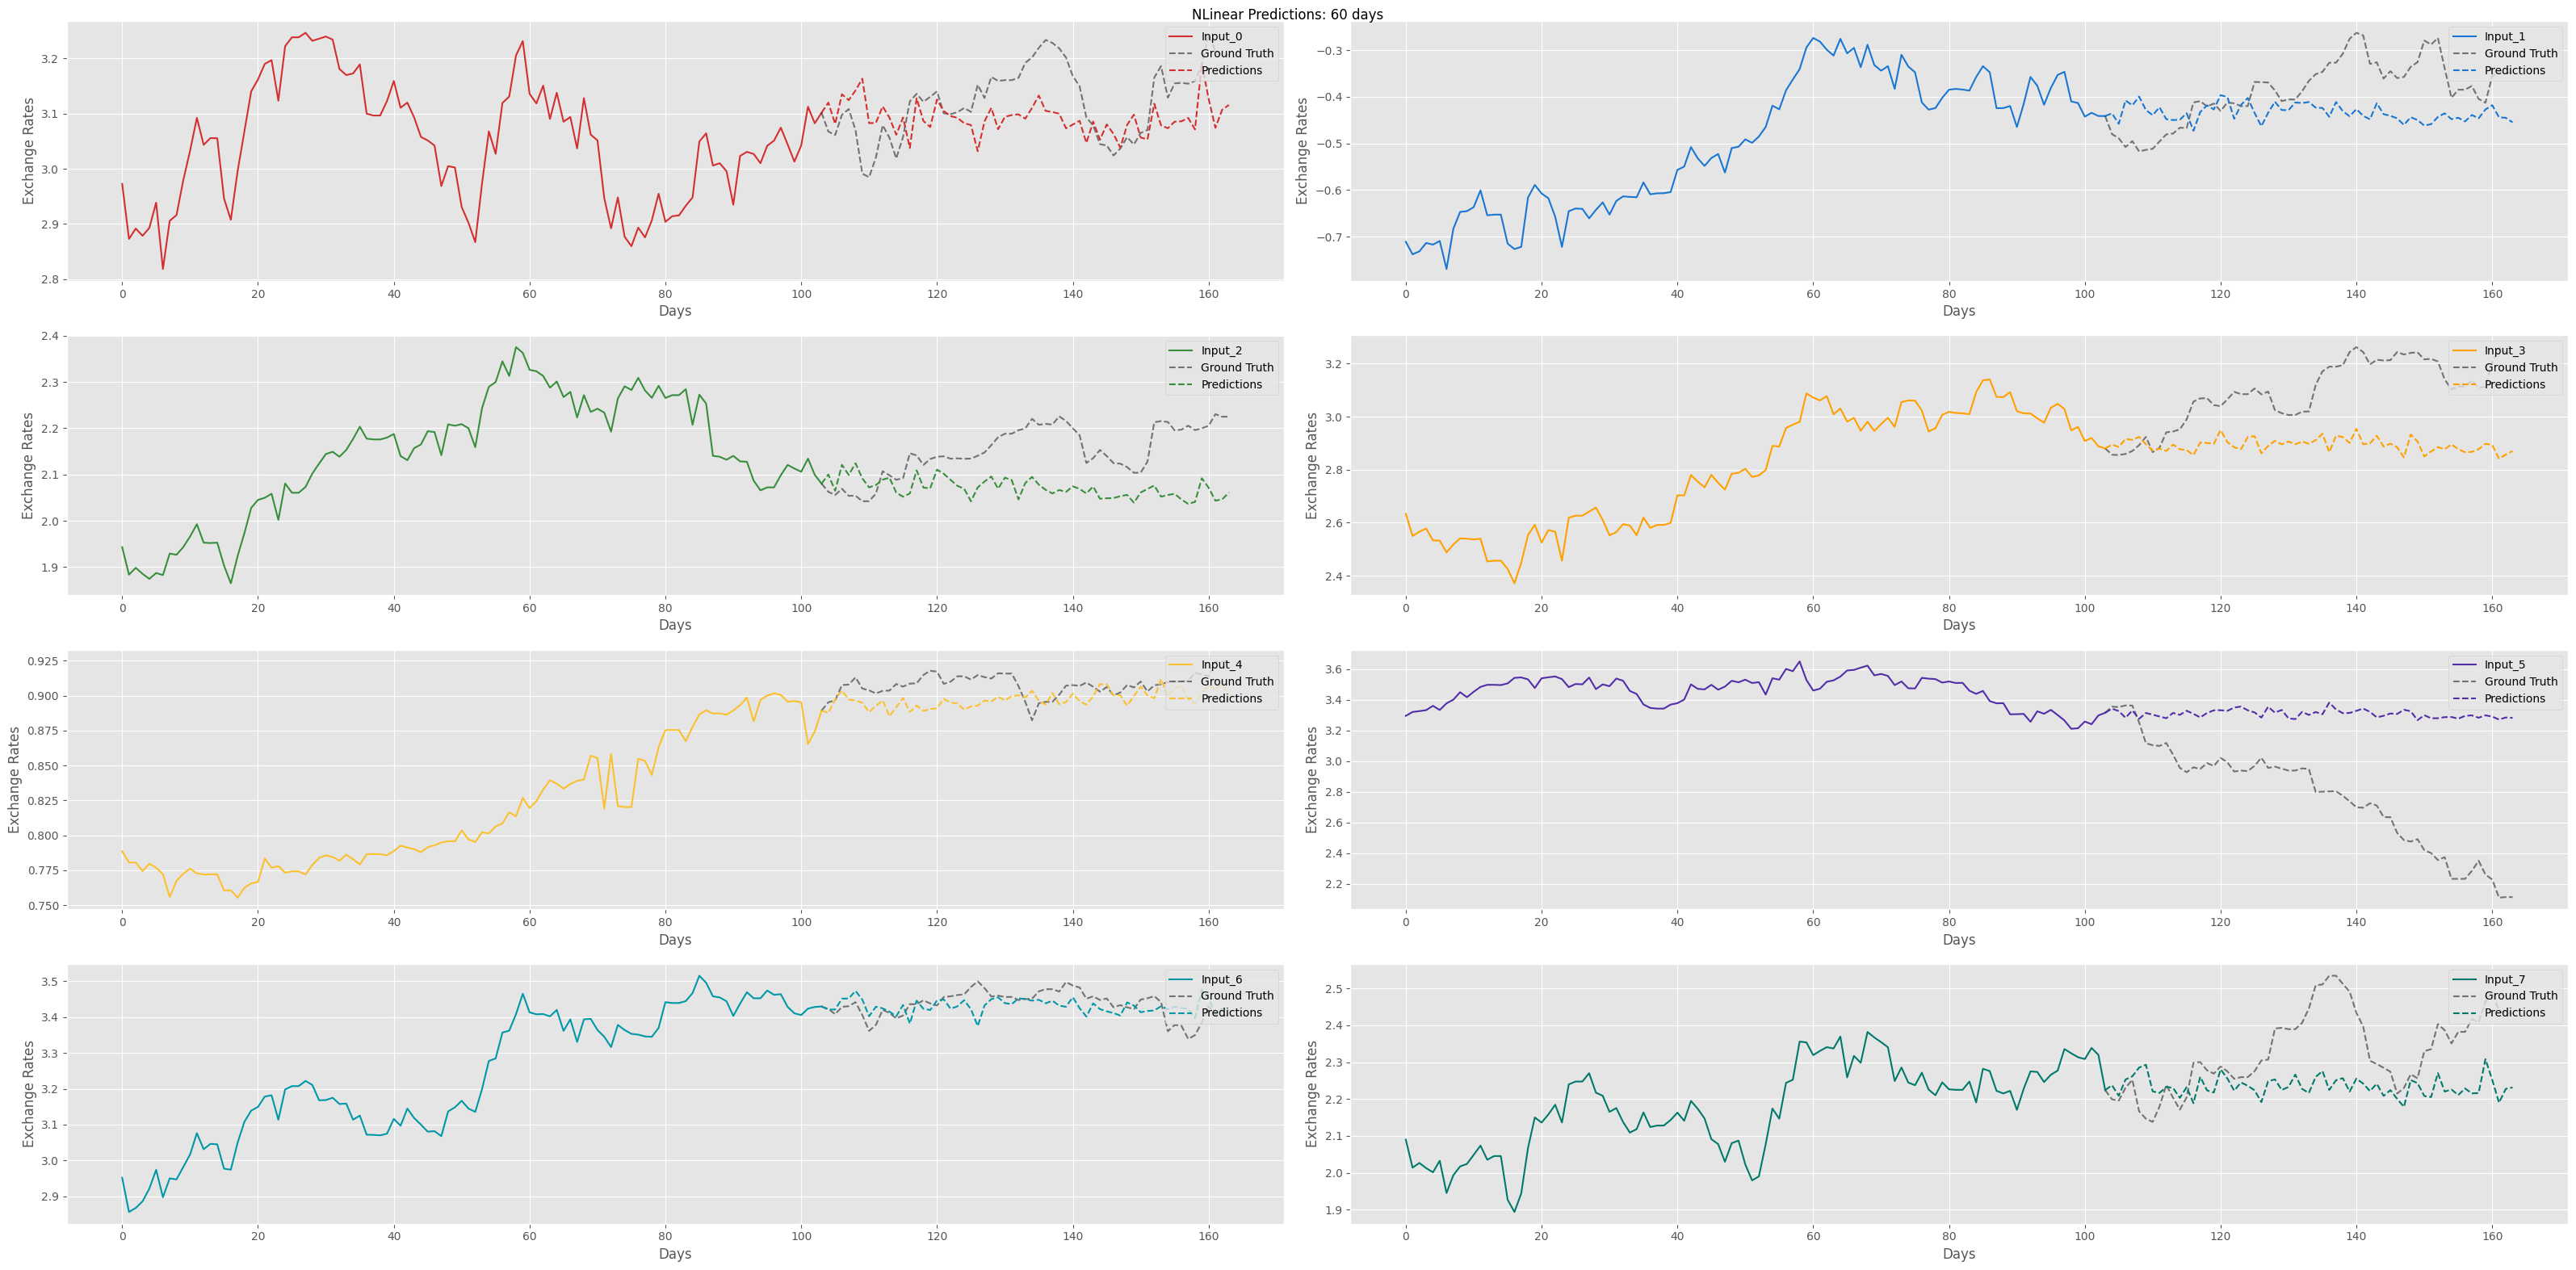

In [19]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][60])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][60])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][60])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = 20

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 60 days")
plt.show()

### Analysis

In [20]:
pred_lengths = [24, 36, 48, 60]
models = ["DLinear", "NLinear"]

"""
Average MSE across all batches
"""

avg_mse_per_prediction_length = {}

for model in models:
    avg_mse_per_prediction_length[model] = {}
    for pred_len in pred_lengths:
        predictions, ground_truth = torch.tensor(predictions_data[model][pred_len]), torch.tensor(ground_truth_data[model][pred_len])
        mse = torch.nn.functional.mse_loss(predictions, ground_truth)
        
        avg_mse_per_prediction_length[model][pred_len] = mse

"""
Distribution of MSE across all batches
"""
all_mse_per_prediction_length = {}

for model in models:
    all_mse_per_prediction_length[model] = {}
    for pred_len in pred_lengths:
        all_mse_per_prediction_length[model][pred_len] = []

        # Compute MSE for each batch
        for batch_index in range(input_data[model][pred_len].shape[0]):
            predictions, ground_truth = torch.tensor(predictions_data[model][pred_len][batch_index,:,:]), \
                                        torch.tensor(ground_truth_data[model][pred_len][batch_index,:,:])

            mse = torch.nn.functional.mse_loss(predictions, ground_truth)

            all_mse_per_prediction_length[model][pred_len].append(mse)

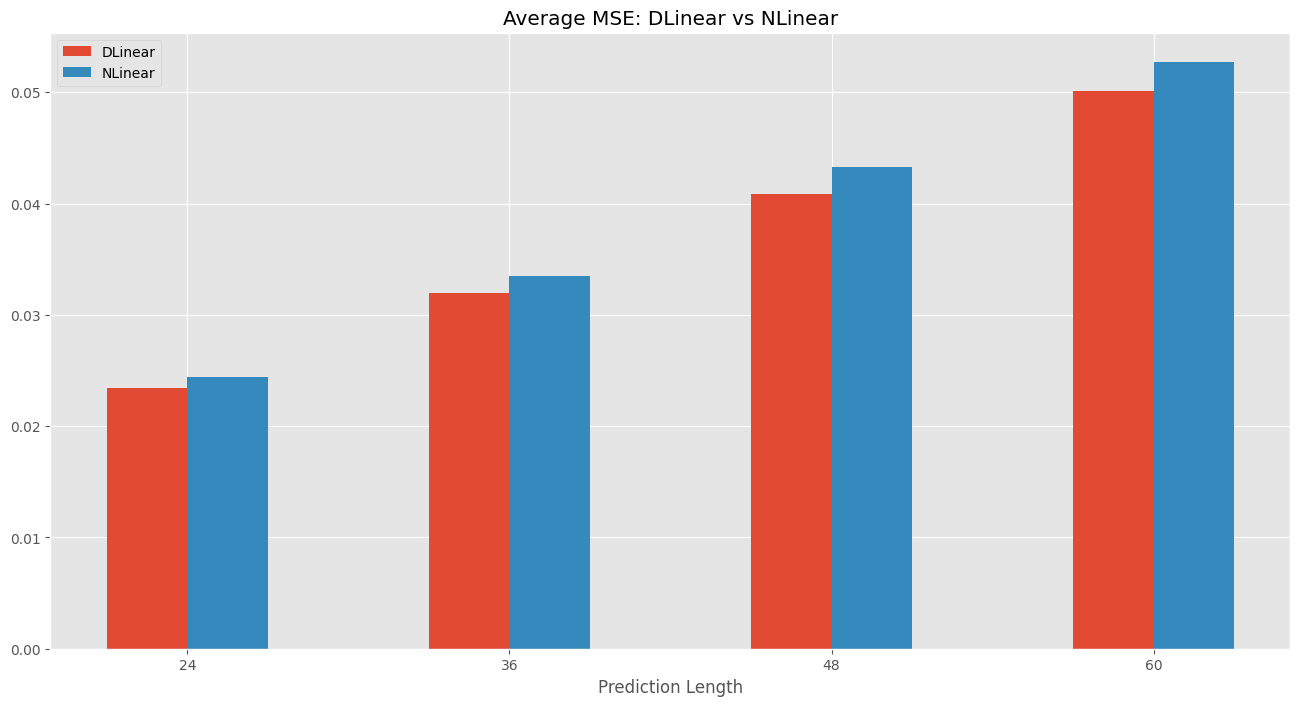

In [21]:
"""
Plot average MSE for DLinear vs NLinear
"""
width = 3
x_axis = np.array(pred_lengths)

plt.figure(figsize=(16, 8))
plt.bar(x_axis, avg_mse_per_prediction_length["DLinear"].values(), width=width, label="DLinear")
plt.bar(x_axis+width, avg_mse_per_prediction_length["NLinear"].values(), width=width, label="NLinear")
plt.legend()

plt.xticks(x_axis + (width/2), x_axis)
plt.xlabel("Prediction Length")
plt.title("Average MSE: DLinear vs NLinear")
plt.show()

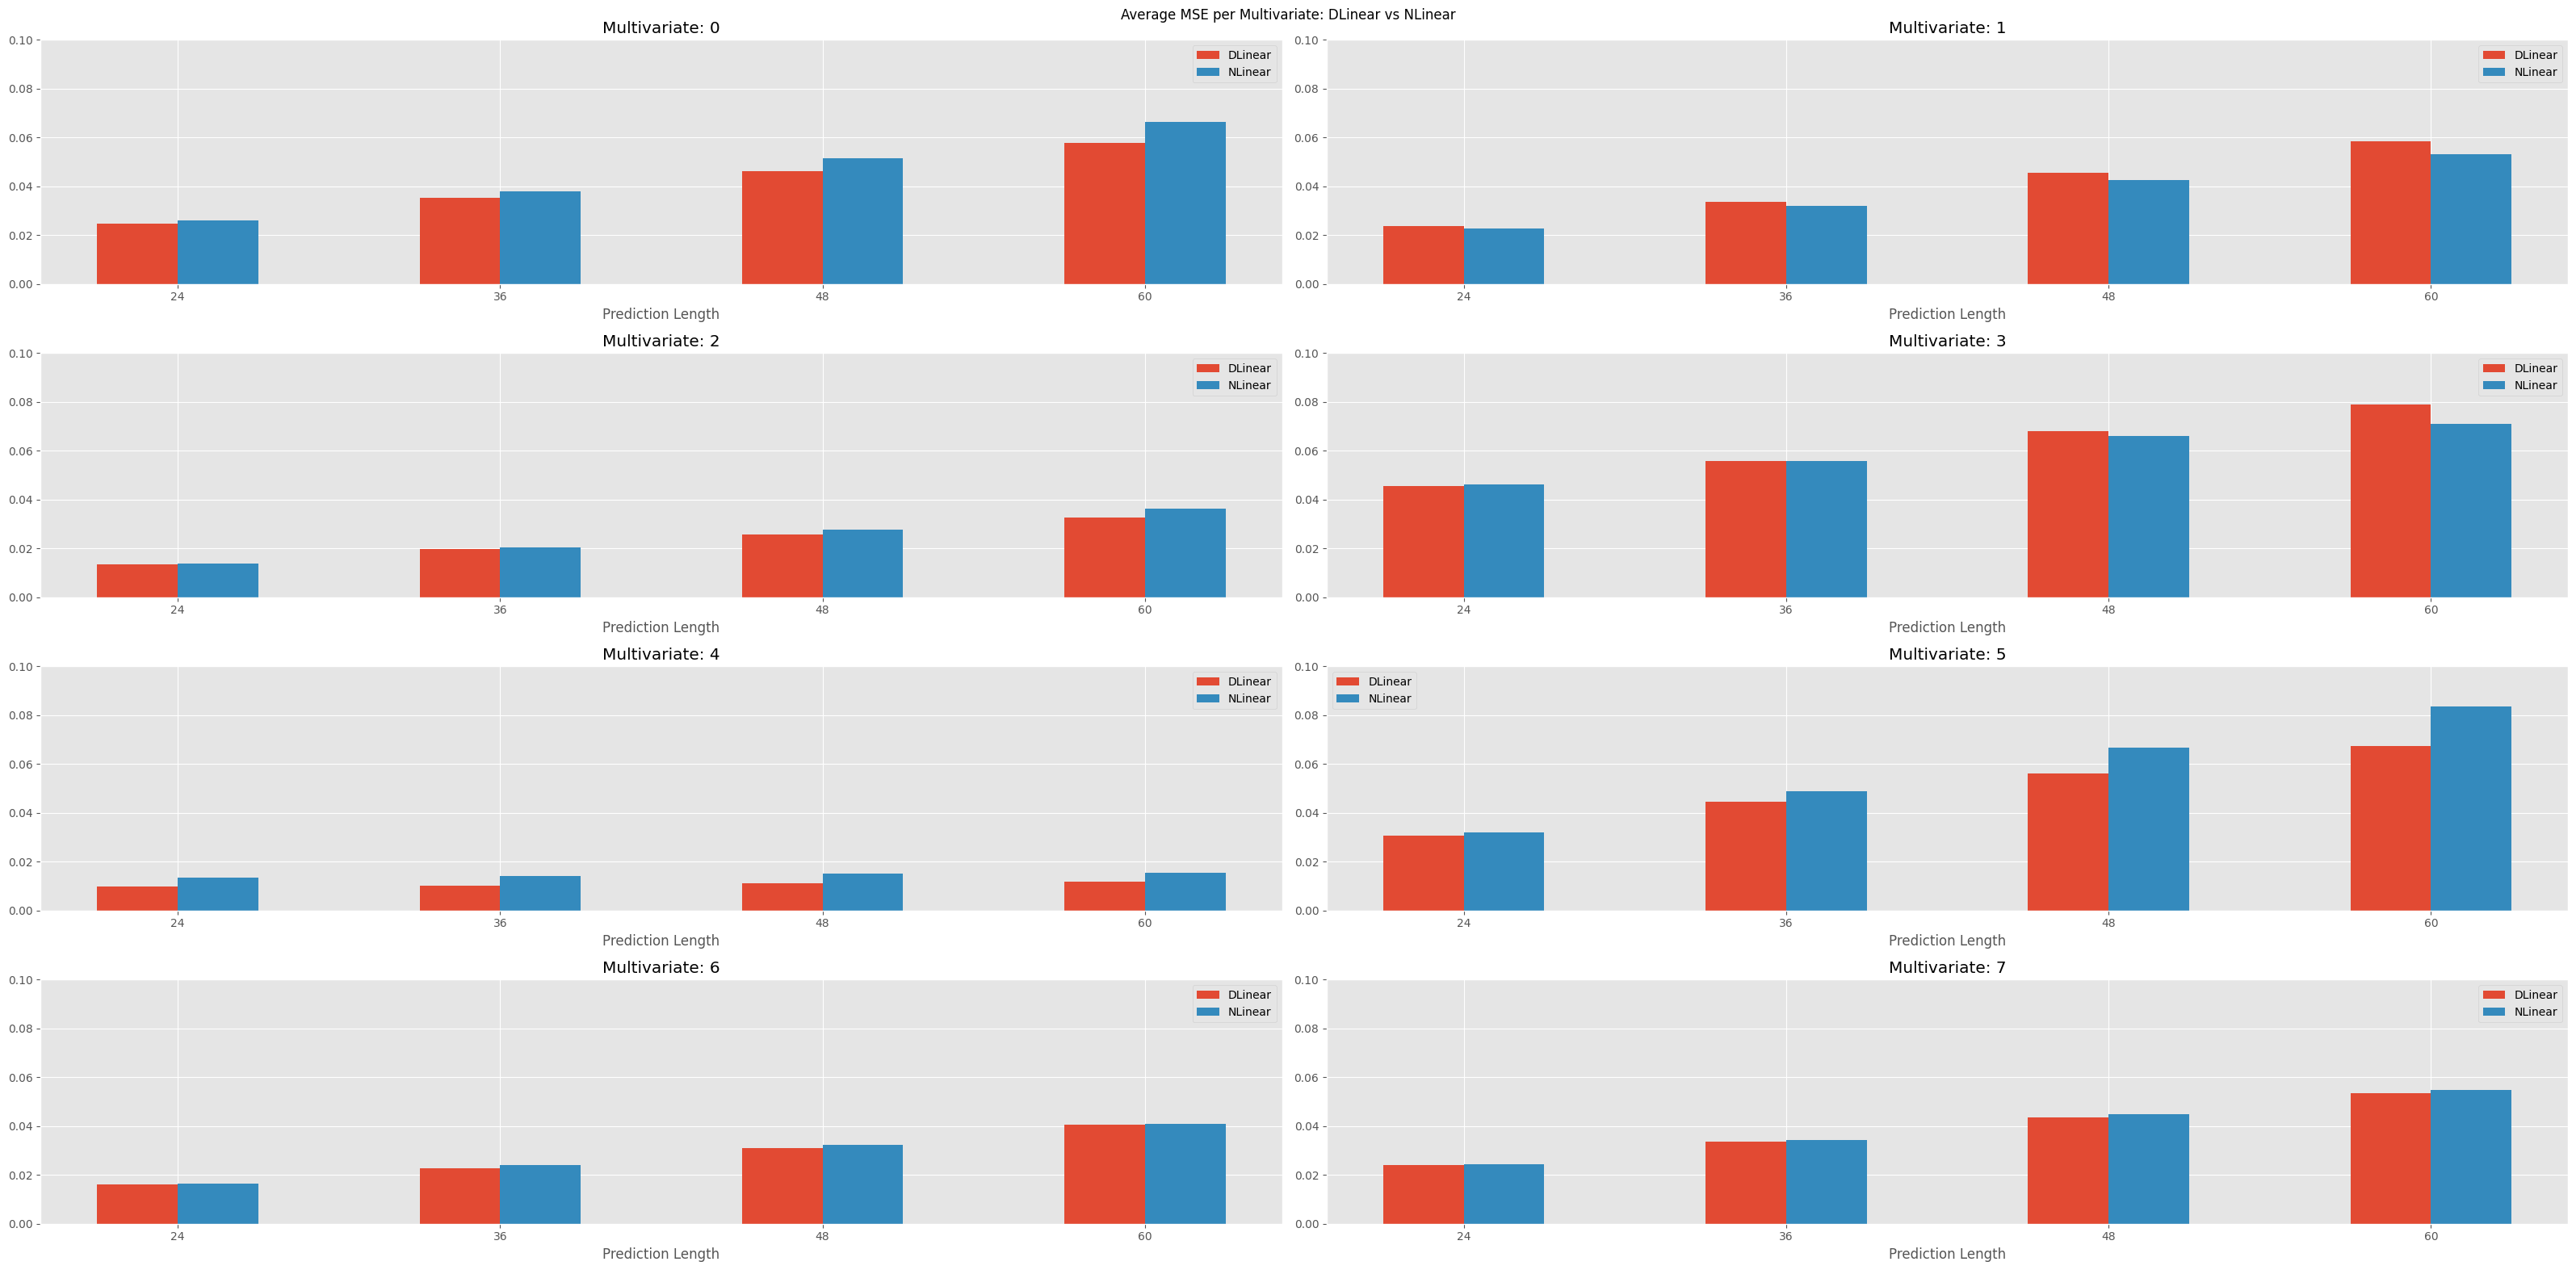

In [41]:
pred_lengths = [24, 36, 48, 60]
models = ["DLinear", "NLinear"]

"""
Average MSE across all batches per multivariate
"""

avg_mse_per_prediction_length_multivariate = {}

for model in models:
    avg_mse_per_prediction_length_multivariate[model] = {}
    for pred_len in pred_lengths:
        predictions, ground_truth = torch.tensor(predictions_data[model][pred_len]), torch.tensor(ground_truth_data[model][pred_len])
        # Compute MSE for each multivariate
        mse_multivariate = torch.mean((predictions - ground_truth) ** 2, dim=(0, 1))
        
        
        avg_mse_per_prediction_length_multivariate[model][pred_len] = mse_multivariate


fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

width = 3
x_axis = np.array(pred_lengths)

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    d_linear_mse_multivariate = [mse_pred_len[time_series] for mse_pred_len in avg_mse_per_prediction_length_multivariate["DLinear"].values()]
    n_linear_mse_multivariate = [mse_pred_len[time_series] for mse_pred_len in avg_mse_per_prediction_length_multivariate["NLinear"].values()]
    
    axs[i].bar(x_axis, d_linear_mse_multivariate, width=width, label="DLinear")
    axs[i].bar(x_axis+width, n_linear_mse_multivariate, width=width, label="NLinear")
    axs[i].legend()
    axs[i].set_xticks(x_axis + (width/2), x_axis)
    axs[i].set_xlabel("Prediction Length")
    axs[i].set_ylim([0, 0.1]) # Set same scale of y-axis for every multivariate

    axs[i].set_title(f"Multivariate: {time_series}")

plt.suptitle("Average MSE per Multivariate: DLinear vs NLinear")
plt.show()

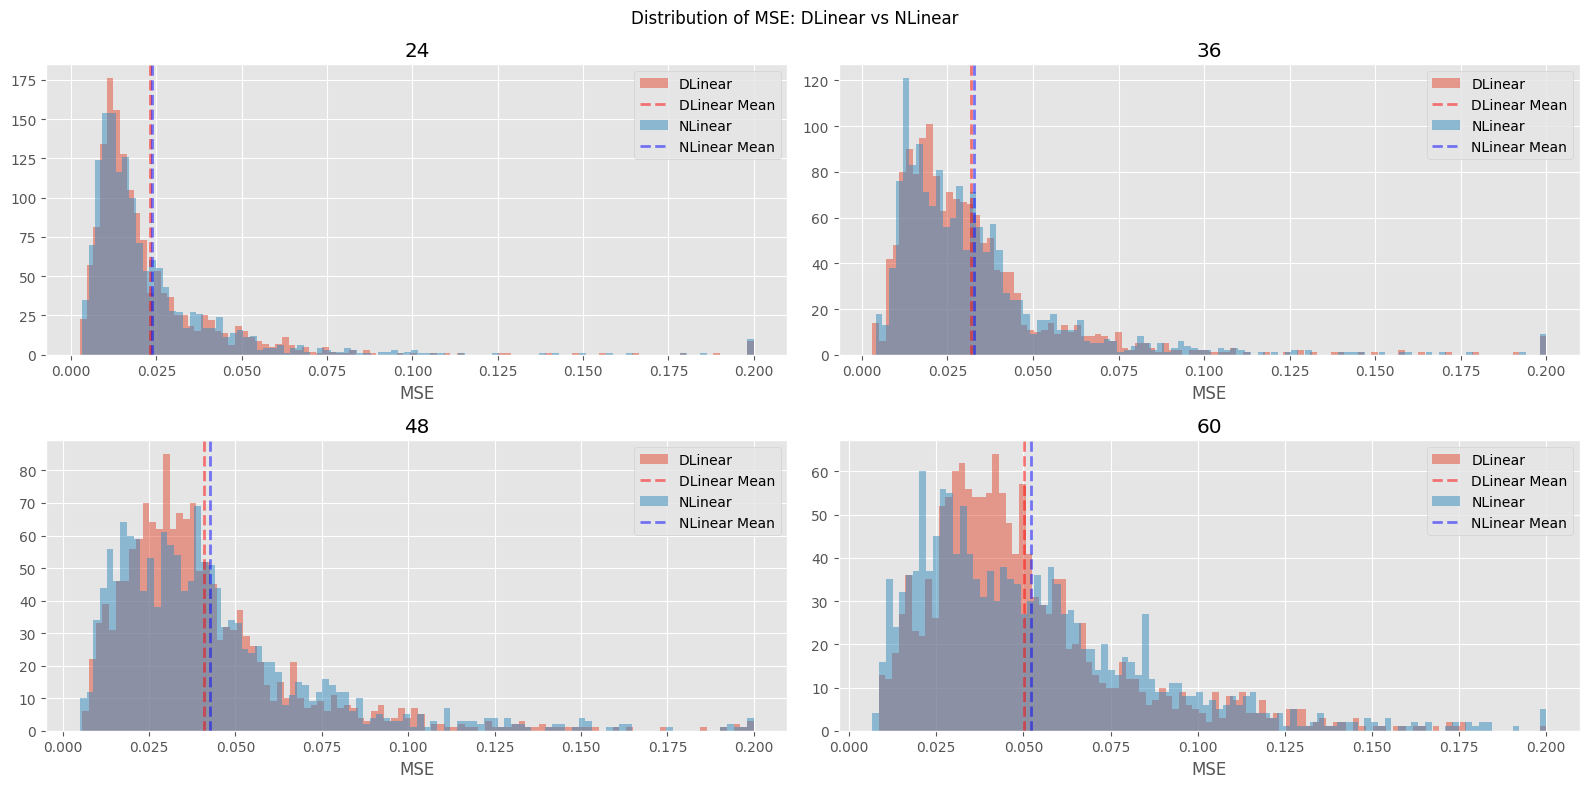

In [153]:
"""
Plot distribution of all MSE for DLinear vs NLinear
"""
width = 3
x_axis = np.array(pred_lengths)

fig, axs = plt.subplots(2,2,figsize=(16,8), layout="tight")
plot_indexes = {24:(0,0), 36:(0,1), 48:(1,0), 60:(1,1)}

# Plots each time series separately
for (pred_len, i) in plot_indexes.items():
    D_linear_mse = np.clip(all_mse_per_prediction_length["DLinear"][pred_len], 0, 0.2)
    N_linear_mse = np.clip(all_mse_per_prediction_length["NLinear"][pred_len], 0, 0.2)
    
    axs[i].hist(D_linear_mse, bins=100, alpha=0.5, label="DLinear")
    axs[i].axvline(D_linear_mse.mean(), color="red", alpha=0.5, linestyle='dashed', linewidth=2, label="DLinear Mean")
    
    axs[i].hist(N_linear_mse, bins=100, alpha=0.5, label="NLinear")
    axs[i].axvline(N_linear_mse.mean(), color="blue", alpha=0.5, linestyle='dashed', linewidth=2, label="NLinear Mean")
    
    axs[i].legend()
    axs[i].set_xlabel("MSE")

    axs[i].set_title(f"{pred_len}")

plt.suptitle("Distribution of MSE: DLinear vs NLinear")
plt.show()

# Plot

### Future Predictions (No Ground-Truth)

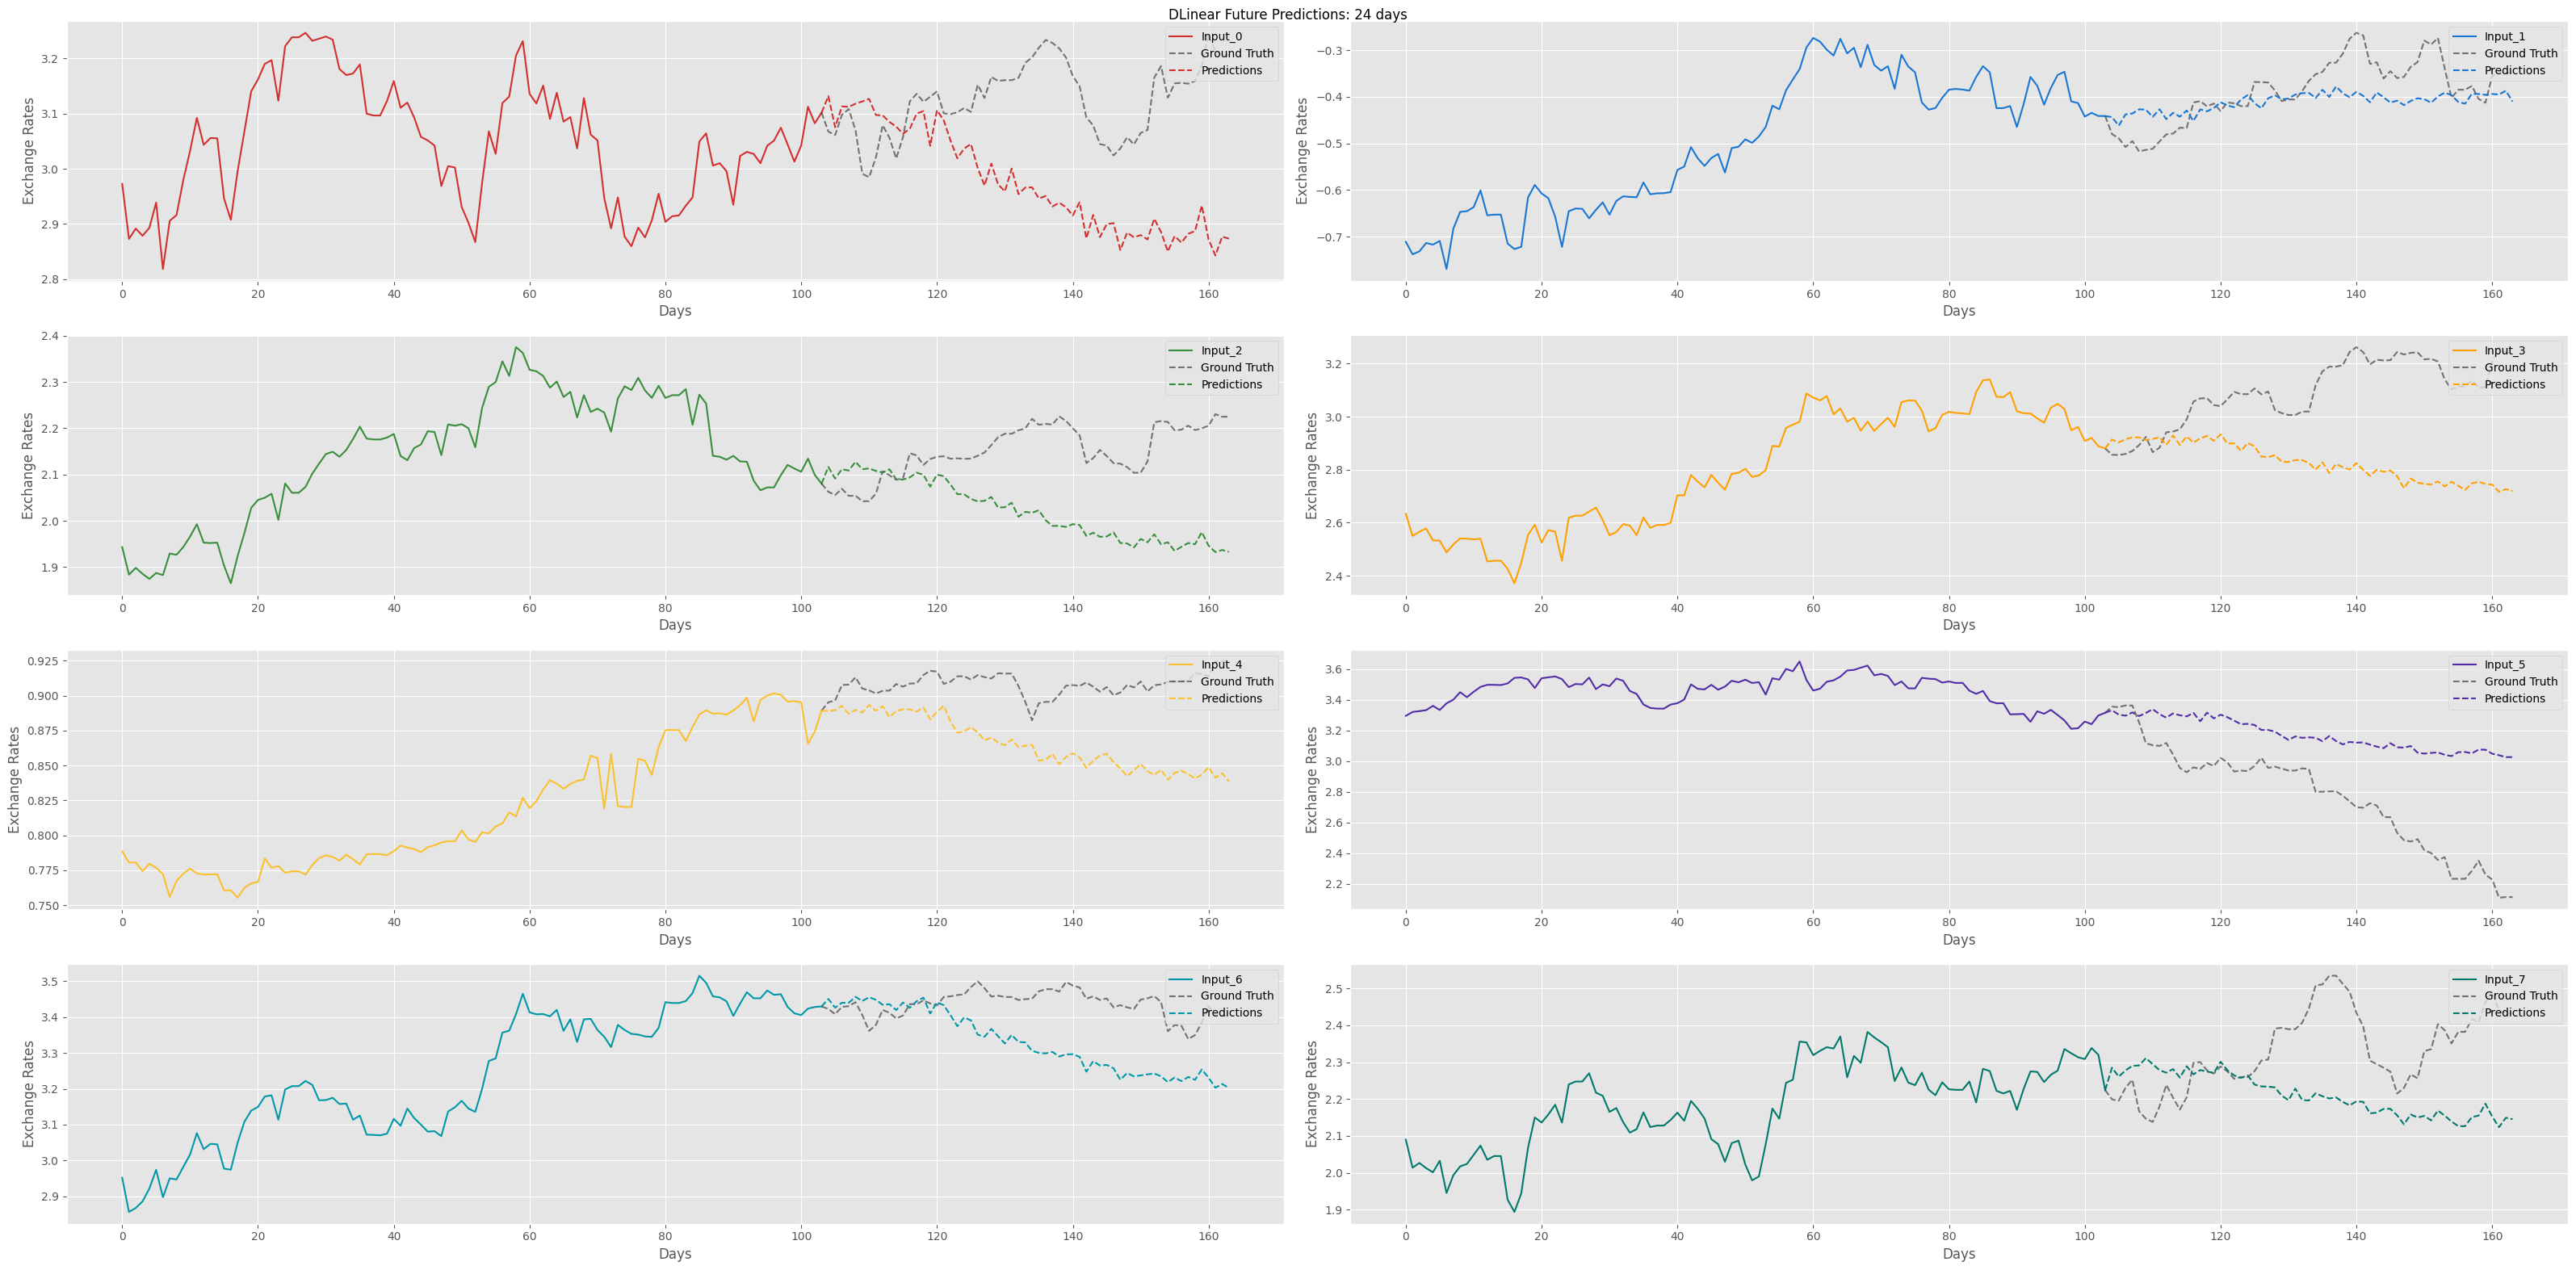

In [15]:
# DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][60])
# DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][60])
# DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][60])

# # Add last time-step point of input onto ground truth and predictions
# DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
# DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

# fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
# plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

# input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# # Shift ground truth and predictions data to end of input data
# predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# # Plots each time series separately
# for (time_series, i) in plot_indexes.items():
#     # Input Plot
#     axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
#     # Ground Truth Plot
#     axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
#     # Predictions
#     axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
#     axs[i].legend(loc="upper right")
#     axs[i].set_xlabel("Days")
#     axs[i].set_ylabel("Exchange Rates")

# plt.suptitle("DLinear Future Predictions: 24 days")
# plt.show()

## Linear

### 24 Days

In [20]:
# LINEAR_INPUT_TIME_SERIES = torch.from_numpy(future_input_data.iloc[:,1:].values)  # Drop date column
# LINEAR_PREDICTIONS_TIME_SERIES = torch.from_numpy(future_predictions_data["NLinear"][24].iloc[:,1:].values)  # Drop date column

# # Add last time-step point of input onto ground truth and predictions
# LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[-1,:].unsqueeze(0), LINEAR_PREDICTIONS_TIME_SERIES), dim=0)

# fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
# plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

# input_x_axis = future_input_data["date"]
# # Insert last date into predictions time series
# predictions_x_axis = pd.concat([pd.Series([future_input_data["date"].iloc[-1]]), future_predictions_data["NLinear"][24]["date"] ])

# # Plots each time series separately
# for (time_series, i) in plot_indexes.items():
#     # Input Plot
#     axs[i].plot(input_x_axis, LINEAR_INPUT_TIME_SERIES[:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    
#     # Predictions
#     axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")

#     axs[i].legend(loc="upper right")
#     axs[i].set_xlabel("Days")
#     axs[i].set_ylabel("Exchange Rates")

# plt.suptitle("Linear Future Predictions: 24 days")
# plt.show()
